In [ ]:
# default_exp gbe.longitudinal_data

# Longitudinal data

In [ ]:
update_all_data = False

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Initial participants
ToDo: This should come from a function.

In [ ]:
initial = pd.read_csv('../data/interim/initial_participants.csv')
initial_participants = initial['participant']

### Information sampling task

In [ ]:
#len(dp.get_gbe_data()) #Hilmar removed

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_baseline'], update = update_all_data), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_baseline==False")
df = df[df.participant.isin(initial_participants)]
ist = ist_scoring.get_oversampling_predicted_joint(df)[0]
ist = ist.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
#ist = ist.groupby('participant').mean()
ist = ist.rename(columns = {"oversampling_predicted_joint":"ist_oversampling"})

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("(is_baseline==False)")
df = df[df.participant.isin(initial_participants)]
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep_trial(df)[0]
wm = wm.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

5 participants used an old version of the task in some of their sessions.  23 sessions (0.89%) were removed from the dataset.
30 sessions (1.18%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("(is_baseline==False)")
df = df[df.participant.isin(initial_participants)]
rtt = rtt_scoring.get_perc_gamble_predicted_joint(df)[0]
rtt = rtt.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("(is_baseline==False)")
df = df[df.participant.isin(initial_participants)]
sst = sst_scoring.get_ssrt_predicted_joint(df)[0]
sst = sst.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.rename(columns = {'ssrt_predicted_joint':'ssrt'})

In [ ]:
sst.to_csv('../data/processed/sst_predicted_joint_longitudinal.csv')
wm.to_csv('../data/processed/wm_predicted_joint_longitudinal.csv')
rtt.to_csv('../data/processed/rtt_predicted_joint_longitudinal.csv')
ist.to_csv('../data/processed/ist_predicted_joint_longitudinal.csv')

### Drinking

In [ ]:
#initial_participants = dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']).query("is_initial").participant.unique()
#len(initial_participants)

### AUD criteria

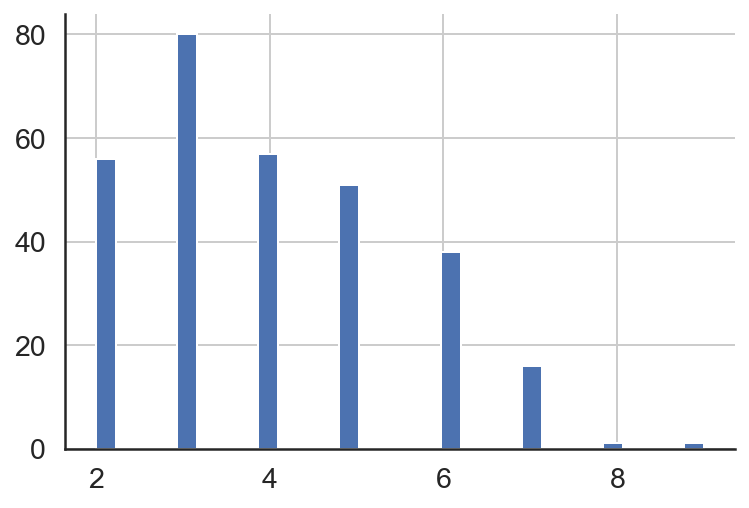

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

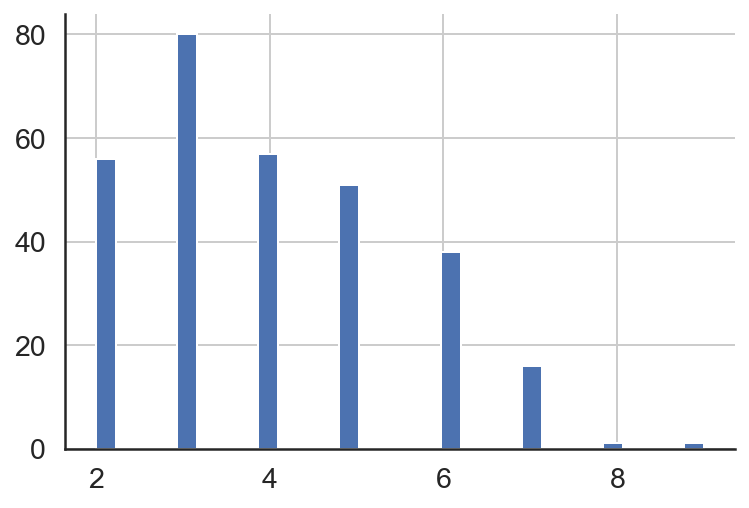

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Drinking days
16 participants did not report to drink any alcohol during the first EMA month.

In [ ]:
two_day = dp.get_two_day_data(update = update_all_data)
#drinking_days = two_day.query("sampling_day<30")#.groupby('participant').g_alc.agg(['mean','median'])
#drinking_days['drinking_days'] = ema_drinking.g_alc>0
#drinking_days = drinking_days.groupby('participant')[['g_alc','drinking_days']].sum().reset_index()
#drinking_days = drinking_days[drinking_days.participant.isin(initial_participants)].set_index('participant')

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1)
tasks.to_csv

print(len(tasks))
tasks = tasks.dropna()
print(len(tasks))
tasks = tasks.loc[:,~tasks.columns.duplicated()]

2629
2480


In [ ]:
len(tasks.participant.unique())

296

In [ ]:
df = tasks.merge(dp.get_gbe_data(columns = ['trigger_date','time_since_last_gbe','ema_session']), on = 'gbe_index', how = 'left')

<AxesSubplot:>

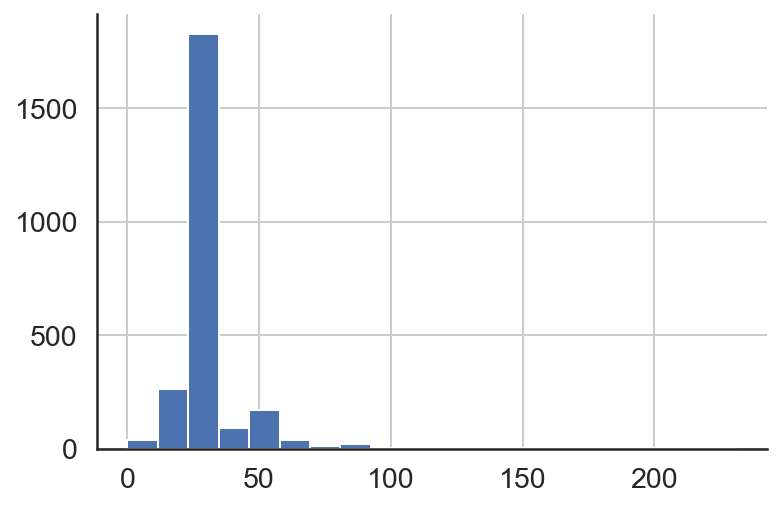

In [ ]:
df.time_since_last_gbe.hist(bins = 20)

<AxesSubplot:>

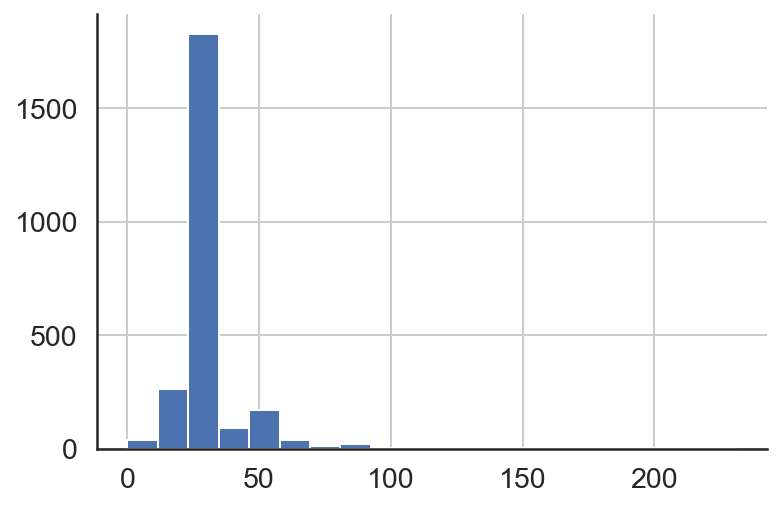

In [ ]:
df.time_since_last_gbe.hist(bins = 20)

> The distance between sessions is mostly 28 days. Some distances are longer (probably due to skipped sessions). Very few are, however also mach shorter.

In [ ]:
df['time_to_next_gbe'] = df.time_since_last_gbe.shift(-1)
# Send maximum to 28 days
df['time_to_next_gbe'][df['time_to_next_gbe'] >= 28] = 28
df.time_to_next_gbe.fillna(28,inplace = True)

> Here we use the distance to the next session or a maximum of 28 days as the window in which we will aggregate drinking data.

> ToDo: This function should be generalized to allow for other windows for exploratory analyses.

In [ ]:
df['end_date'] = df.trigger_date + pd.to_timedelta(df.time_to_next_gbe, unit = 'd')

In [ ]:
two_day['gbe_index'] = None
# Not pretty but it should work
for s in df[['trigger_date','end_date','participant']].reset_index().iterrows():
    gbe_index = s[1].loc['gbe_index']
    starting_date = s[1].loc['trigger_date']
    end_date = s[1].loc['end_date']
    participant = s[1].loc['participant']
    selection = two_day.query('(participant==@participant) and (date<@end_date) and (date >= @starting_date)').index
    two_day.loc[selection, 'gbe_index'] = gbe_index
    
print(end_date)

2021-08-30 15:47:07


In [ ]:
import numpy as np
two_day['drinking_days'] = two_day.g_alc>0
two_day['limit'] = two_day['limit']-1
drinking = two_day.groupby('gbe_index').agg({'g_alc':[np.mean, np.median, np.sum],'drinking_days':np.sum,'limit':[np.median], 'control':np.mean})
drinking.columns = ['_'.join(col).strip() for col in drinking.columns.values]
drinking.loc[drinking.g_alc_mean.isnull(), 'drinking_days_sum'] = np.nan
drinking['g_alc_per_drinking_day'] = drinking['g_alc_sum']/drinking['drinking_days_sum']
drinking = drinking[['g_alc_mean','g_alc_median','g_alc_per_drinking_day','limit_median','control_mean']]

In [ ]:
def lmer_within_between(x, y, df, model_output = False): 
    if '_'.join(x.split('_')[:-1]) == y:
        return np.nan, np.nan
                
    if ('within' in x+y) and ('between' in x+y):
        return np.nan,np.nan # These should be nan
    if ('between' in y) or('within' in y):
        return np.nan,np.nan
    if 'within' in x:
        x_control = '_'.join(x.split('_')[:-1])+'_between'
    #elif 'between' in x:
    #    return np.nan, np.nan
        #x_control = '_'.join(x.split('_')[:-1])+'_within'
    else:
        return lmer(x,y,df)
    
    if model_output:
        model_output = 'print(summary(m))'
    else:
        model_output = ''
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + %(x_control)s + (1 | participant), data=df, na.action = na.exclude) 
    %(model_output)s
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[14]
    """%{'x':x,'x_control':x_control,'y':y,'model_output':model_output},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]
         


## Task score correlations

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
import biuR

def pearson_r(x, y, df):
    return scipy.stats.pearsonr(df[x], df[y])
    

#export
def lmer(x, y, df):    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[10]
    """%{'x':x,'y':y},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]

In [ ]:
lmer('wm_no_1','g_alc_mean',cor)

(-6.573999754130263, 0.06002749806632934)

In [ ]:
lmer('wm_no_1','g_alc_mean',cor)

(-6.573999754130263, 0.06002749806632934)

In [ ]:
import scipy

def correl(df, corr_func = pearson_r):
    df_corr = pd.DataFrame() # Correlation matrix
    
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.drop(columns='participant').columns:
        for y in df.drop(columns='participant').columns:
            try:
                if x==y:
                    corr = (1,0)
                corr = corr_func(x, y, df)
                df_corr.loc[x,y] = corr[0]
                df_p.loc[x,y] = corr[1]
            except:
                df_corr.loc[x,y] = np.nan
                df_p.loc[x,y] = np.nan

    return df_corr, df_p

def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = pearson_r):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    
    #sig = (df_p < alpha).replace({True:"*",False:""})
    
    sig = df_p
    sig.where(sig>=.001).fillna(2)
    sig = sig.where(sig>=.01).fillna(3)
    sig = sig.where(sig>.05).fillna(4)
    sig = sig.where(sig>1).fillna(5)
    sig = sig.replace({2:"***"})
    sig = sig.replace({3:"**"})
    sig = sig.replace({4:"*"})
    sig = sig.replace({5:""})

    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: ('%.2f'%x).replace('0.','.'))
    try:
        df_corr_label = df_corr_label + sig
    except:
        df_corr_label = "err"
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    #p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()
    

In [ ]:
labels = {
    "wm_no_1":"no distractor (long)",
    "wm_no_2":"no distractor (short)",
    "wm_encoding":"encoding distractor",
    "wm_delayed":"delayed distractor",
    "rtt_win":"% gambles (win)",
    "rtt_loss":"% gambles (loss)",
    "rtt_mixed":"% gambles (mixed)",
    "ist_oversampling":"oversampling",
    "last_three_month":"Drinks per day",
    "g_alc_per_day_last_three_month":"g/alc per day",
    "g_alc_per_drinking_day_last_three_month":"g/alc per drinking day",
    "drinking_days_last_three_month":"Drinking days",
    "aud":"AUD criteria",
    "g_alc_mean":"Mean consumption",
    "g_alc_median":"Median consumption",
    "drinking_days":" Drinking days",
    "g_alc_per_drinking_day":" g/alc per drinking day"
}

next step: change window of drikning and beetter nan handling

### Based on mixed models
e.g., `g_alc_mean ~ ssrt + (1|participant)`

In [ ]:
from trr265.stats import decompose_within_between

2210


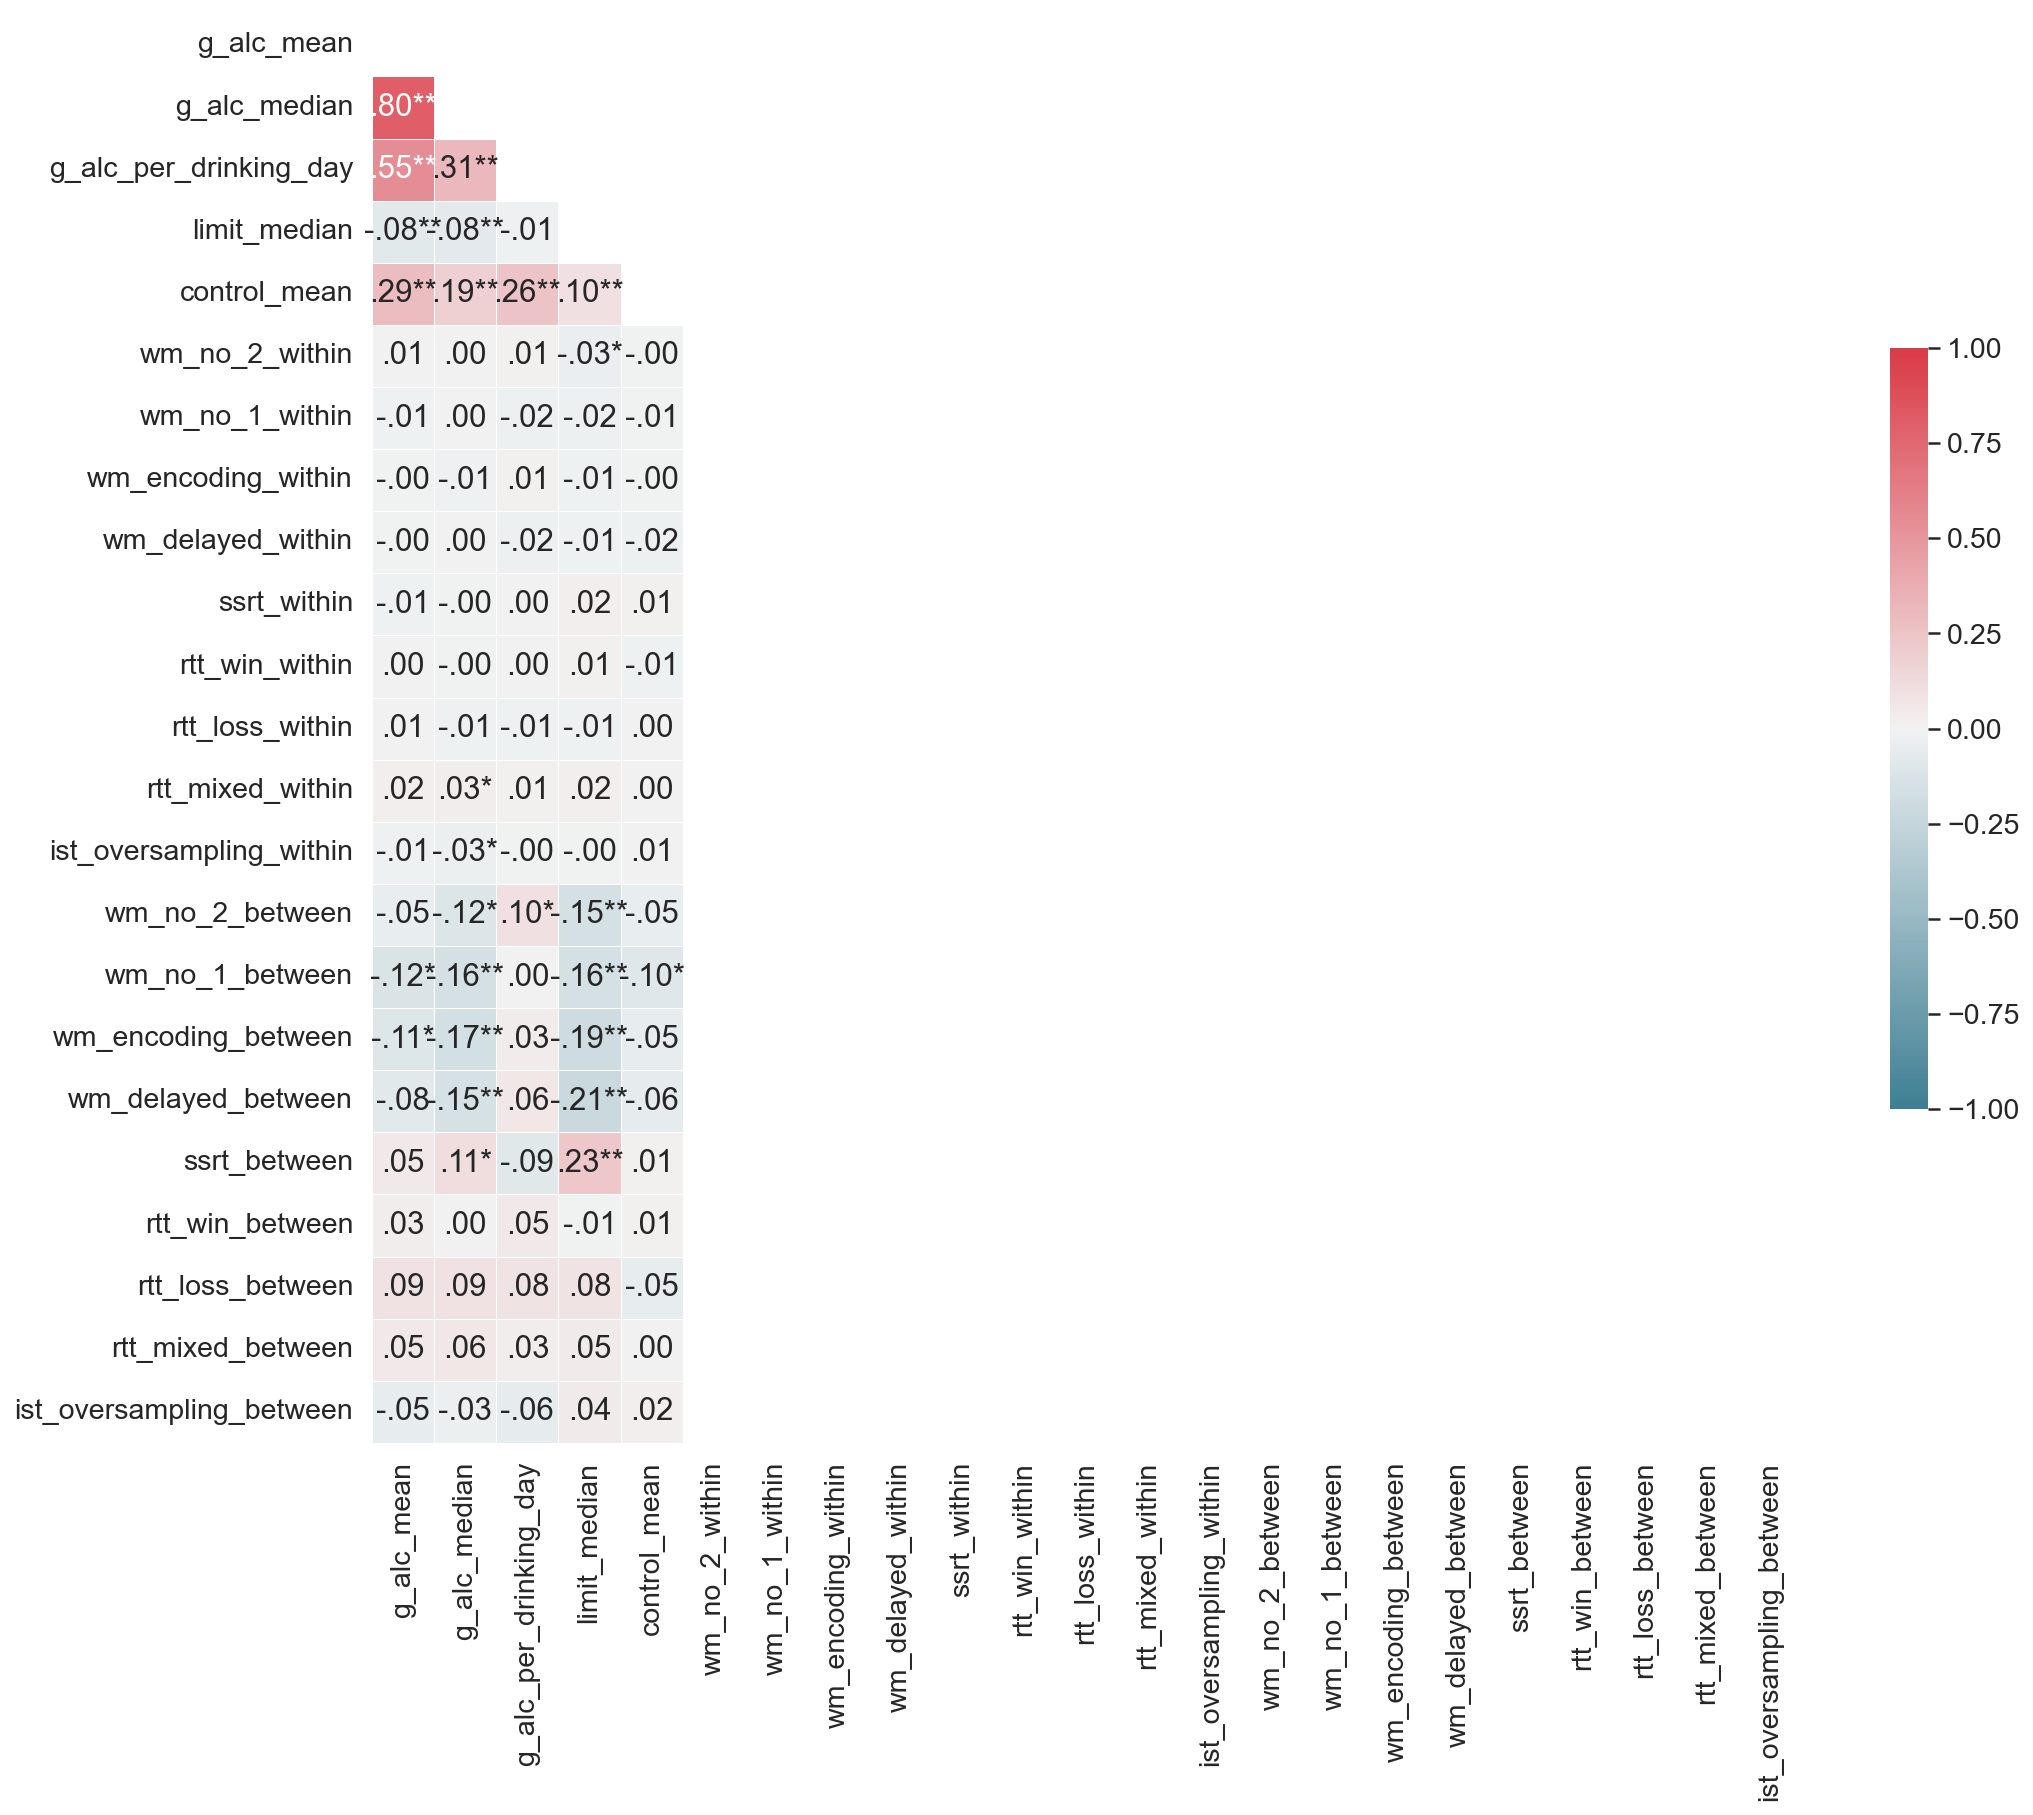

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor = decompose_within_between(cor,columns = columns)
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.drop(columns=['session_number']).reset_index(), corr_func = lmer_within_between, size = (16, 14))

2210


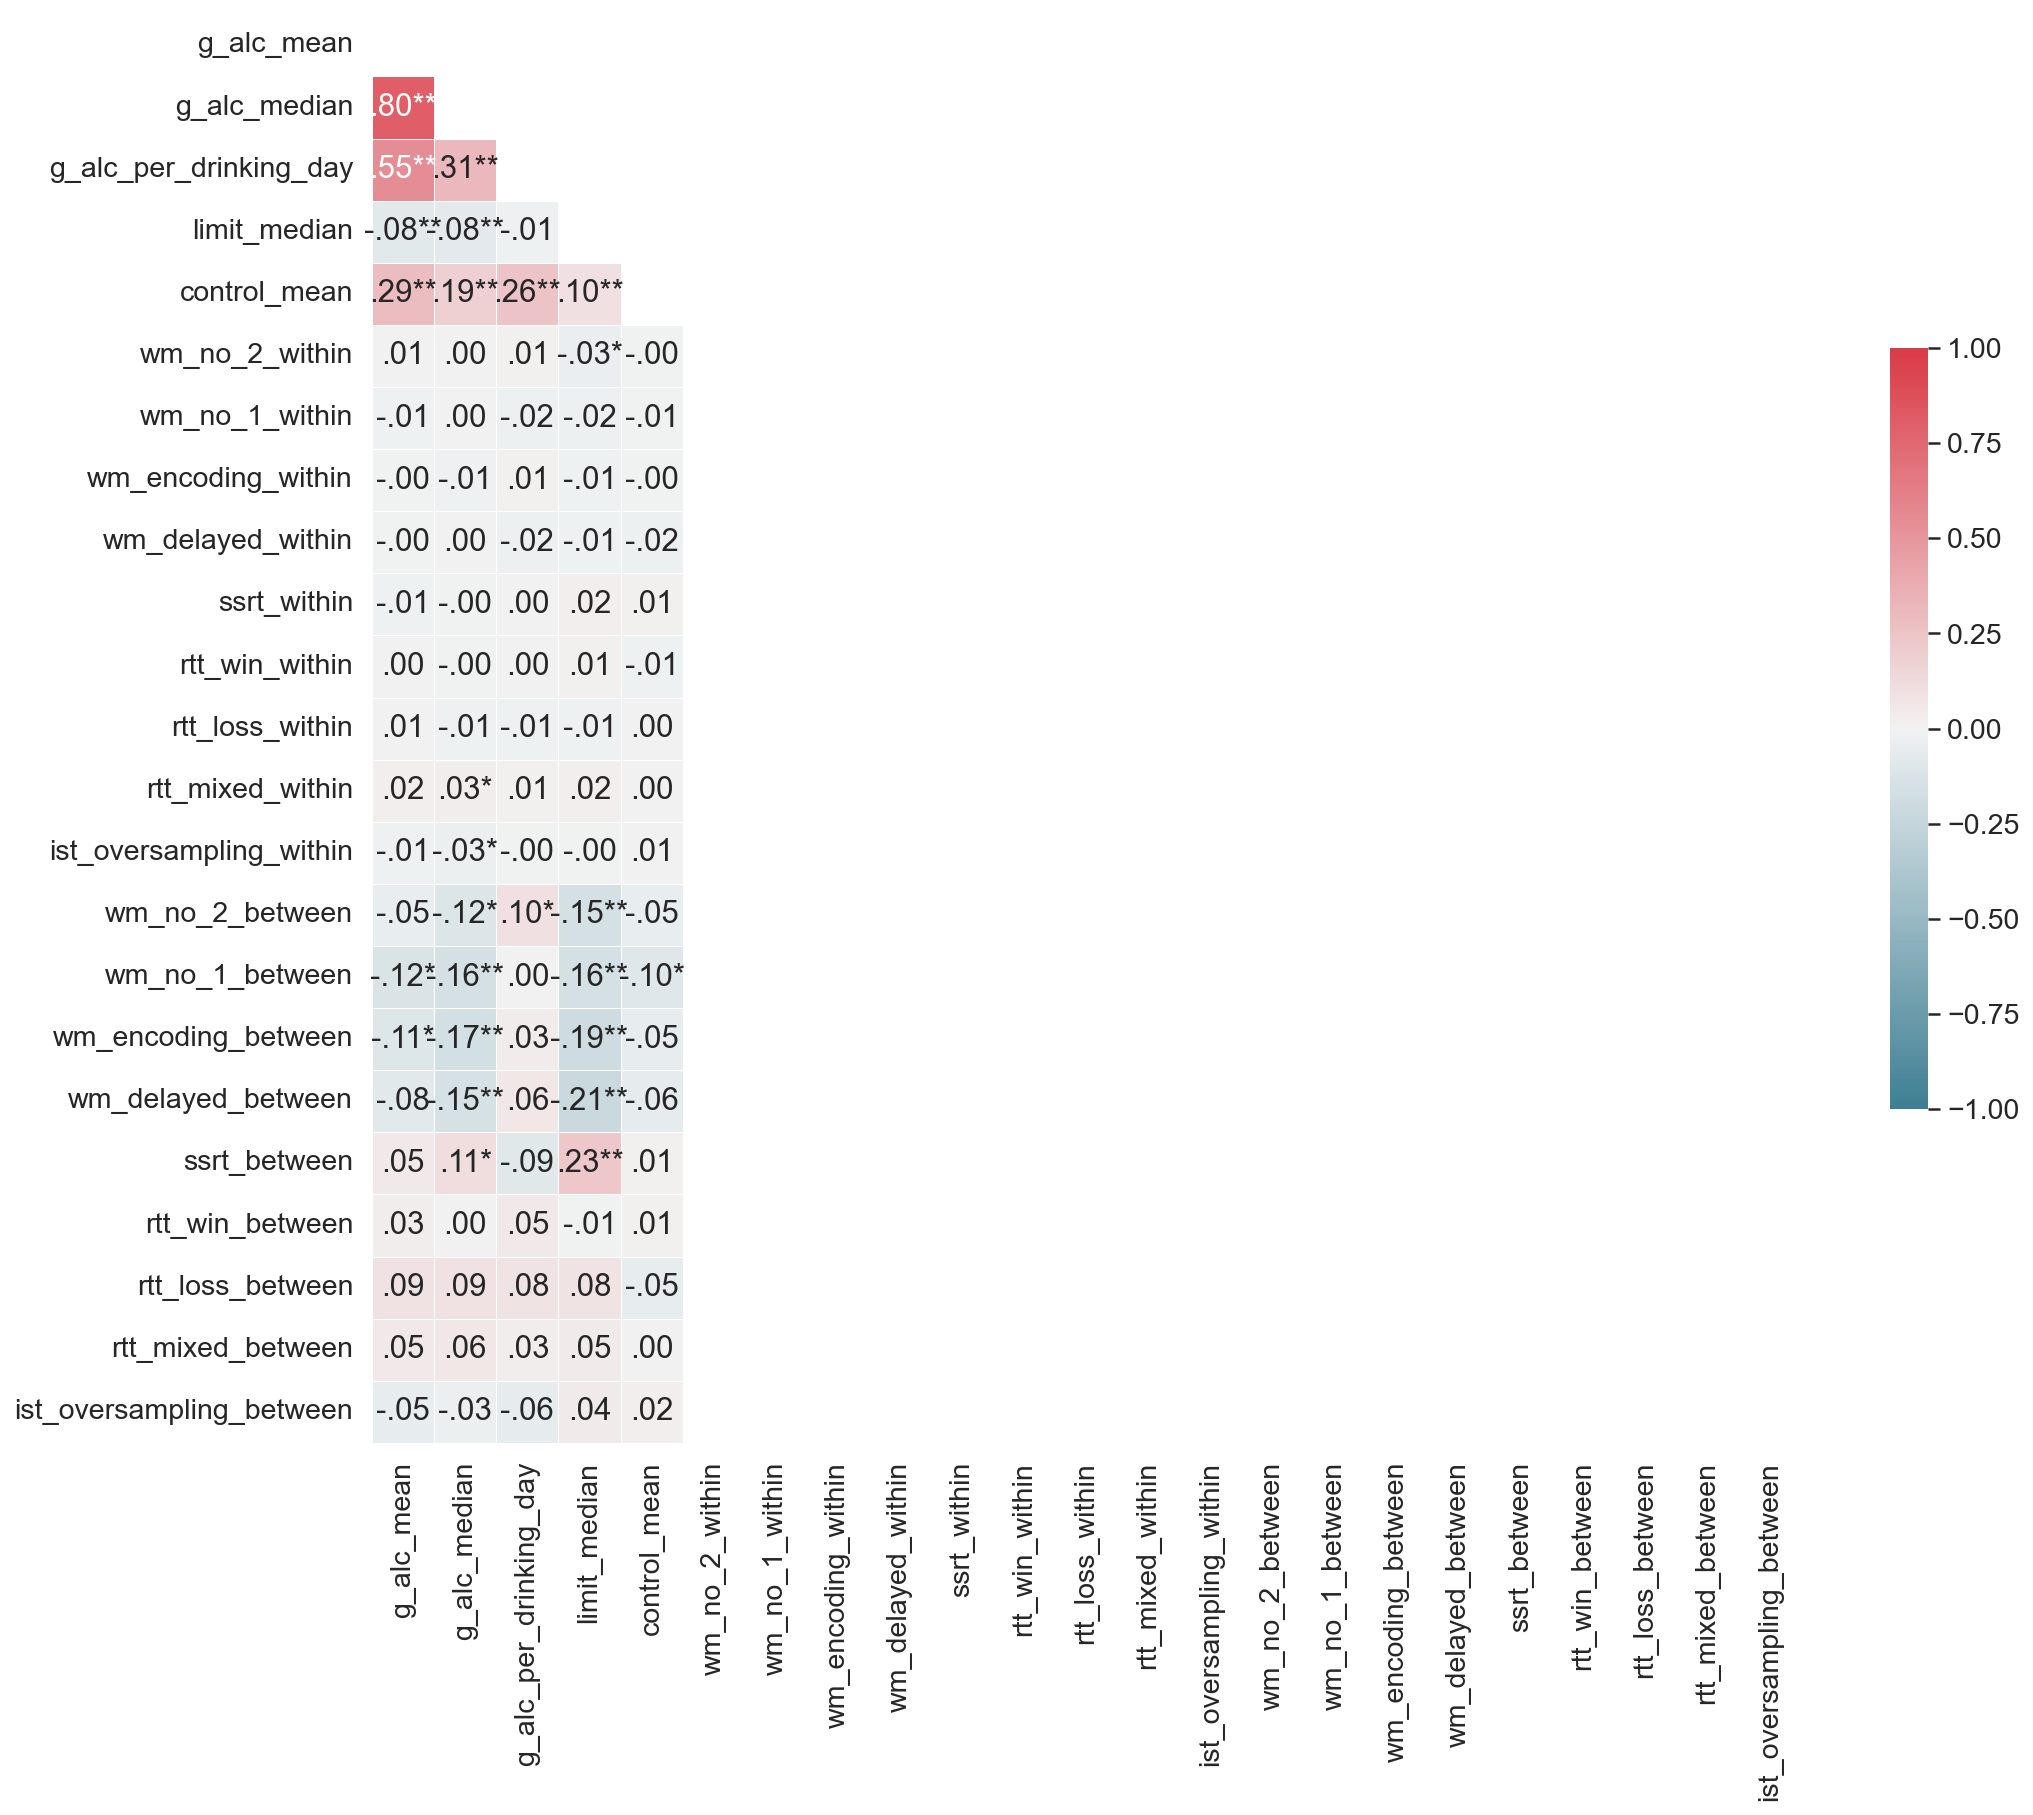

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor = decompose_within_between(cor,columns = columns)
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.drop(columns=['session_number']).reset_index(), corr_func = lmer_within_between, size = (16, 14))

#### Oversampling and consumption

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor2_d = decompose_within_between(cor,columns = columns)
#cor2_d = cor.set_index('participant')
#cor2 = (cor2-cor2.mean())/cor2.std()

In [ ]:
lmer_within_between('ist_oversampling_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ist_oversampling_within + ist_oversampling_between +  
    (1 | participant)
   Data: df

REML criterion at convergence: 4512.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5605 -0.3992 -0.0816  0.3874  8.7041 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6474   0.8046  
 Residual                0.3174   0.5634  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)                -0.04475    0.04973  290.55145  -0.900   0.3689  
ist_oversampling_within    -0.03003    0.01199 1930.09427  -2.505   0.0123 *
ist_oversampling_between   -0.02937    0.05040  285.82343  -0.583   0.5605  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
               (Intr) ist_vrsmplng_w
ist_vrsm

(-0.03003094781286449, 0.012316983440106384)

In [ ]:
lmer_within_between('ist_oversampling_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ist_oversampling_within + ist_oversampling_between +  
    (1 | participant)
   Data: df

REML criterion at convergence: 4512.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5605 -0.3992 -0.0816  0.3874  8.7041 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6474   0.8046  
 Residual                0.3174   0.5634  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)                -0.04475    0.04973  290.55145  -0.900   0.3689  
ist_oversampling_within    -0.03003    0.01199 1930.09427  -2.505   0.0123 *
ist_oversampling_between   -0.02937    0.05040  285.82343  -0.583   0.5605  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
               (Intr) ist_vrsmplng_w
ist_vrsm

(-0.03003094781286449, 0.012316983440106384)

<AxesSubplot:xlabel='ist_oversampling_within', ylabel='g_alc_median'>

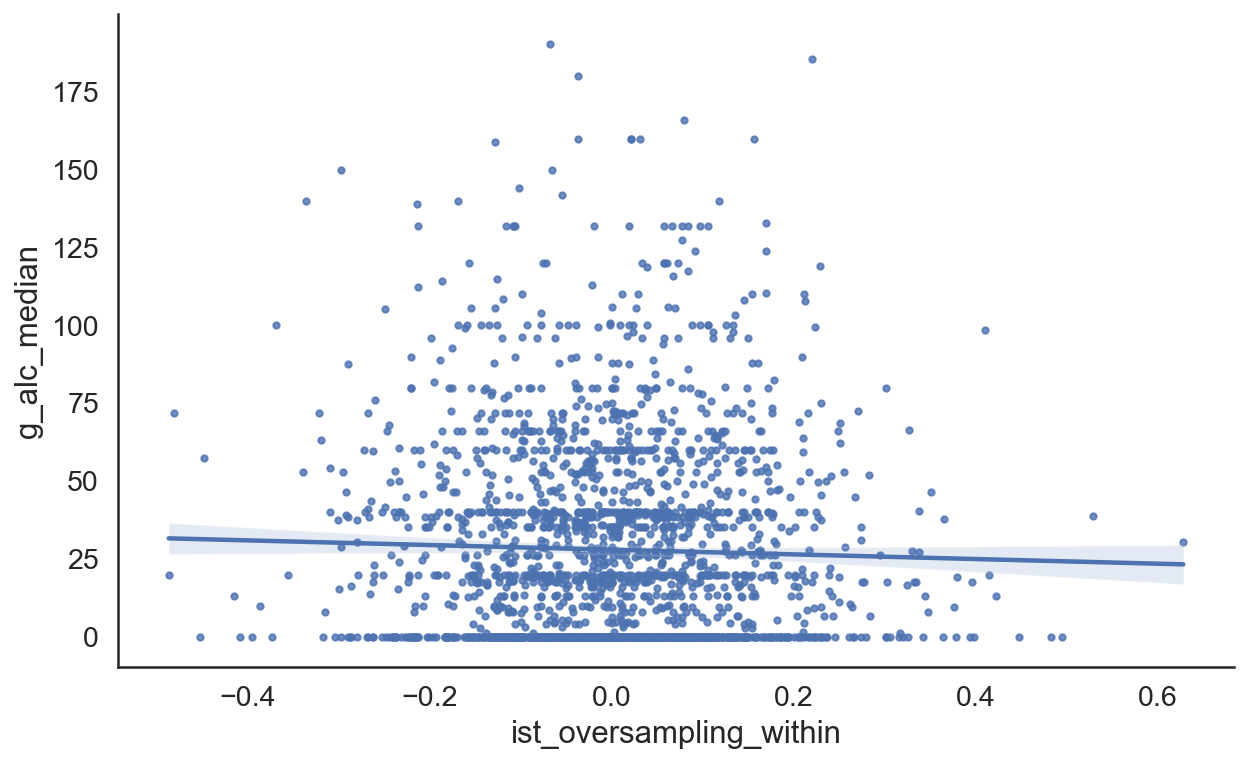

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ist_oversampling_within', y = 'g_alc_median', data = cor2_d,scatter_kws={'s':10})

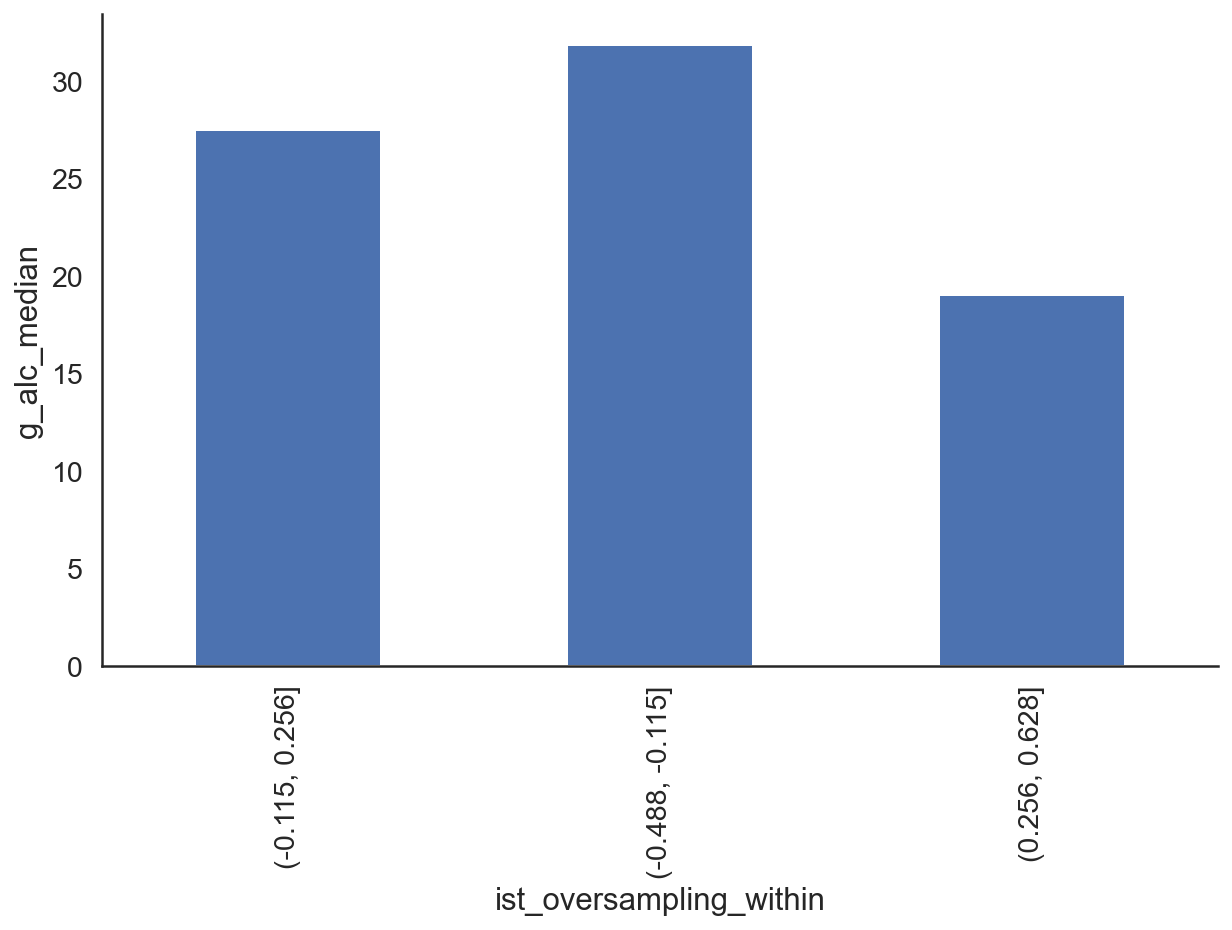

In [ ]:
def binned_plot(x,y,df,bins):
    df['x_binned'] = pd.cut(df[x], 3)
    df = df.sort_values('x_binned')
    df['x_binned'] = df.x_binned.astype(str)
    _df = df.groupby('x_binned')[y].agg([np.mean, np.std]).reset_index()
    ax = _df.plot.bar(x = 'x_binned', y = 'mean',figsize=(10,6), legend = False, sort_columns = False)
    #plt.bar(x)
    #plt.errorbar(df['x_binned'].astype(str), df[y], yerr = _df['std'],fmt='o',ecolor = 'red',color='yellow')
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
binned_plot('ist_oversampling_within', 'g_alc_median', cor2_d, 3)

Text(0.5, 0, 'oversampling within')

<Figure size 720x432 with 0 Axes>

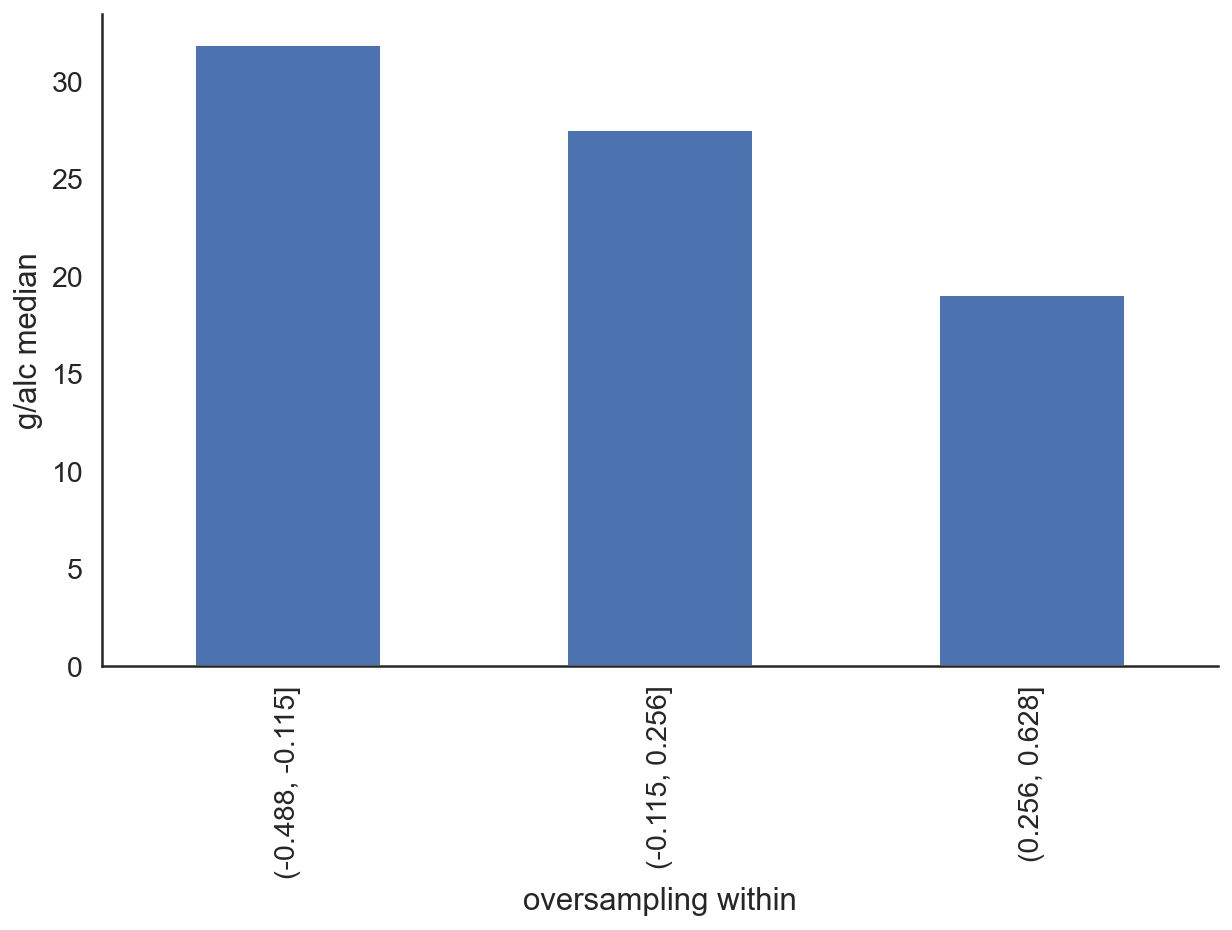

In [ ]:
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ist_oversampling_within, 3)
ax = cor2_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('oversampling within')
#plt.errorbar(x, y, yerr = y_error,fmt='o',ecolor = 'red',color='yellow')

#### WM no encoding (fast) and consumption

In [ ]:
lmer_within_between('wm_no_2_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_no_2_within + wm_no_2_between + (1 | participant)
   Data: df

REML criterion at convergence: 4513.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5717 -0.3962 -0.0822  0.3947  8.7193 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6347   0.7967  
 Residual                0.3183   0.5642  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)     -4.675e-02  4.929e-02  2.915e+02  -0.948   0.3437  
wm_no_2_within   2.679e-03  1.201e-02  1.931e+03   0.223   0.8234  
wm_no_2_between -1.168e-01  4.761e-02  2.948e+02  -2.452   0.0148 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_n_2_w
wm_n_2_wthn 0.000          
wm_n_2_btwn 0.018  0.000   


(0.0026791118252776514, 0.8234255247594371)

<AxesSubplot:xlabel='wm_no_2_between', ylabel='g_alc_median'>

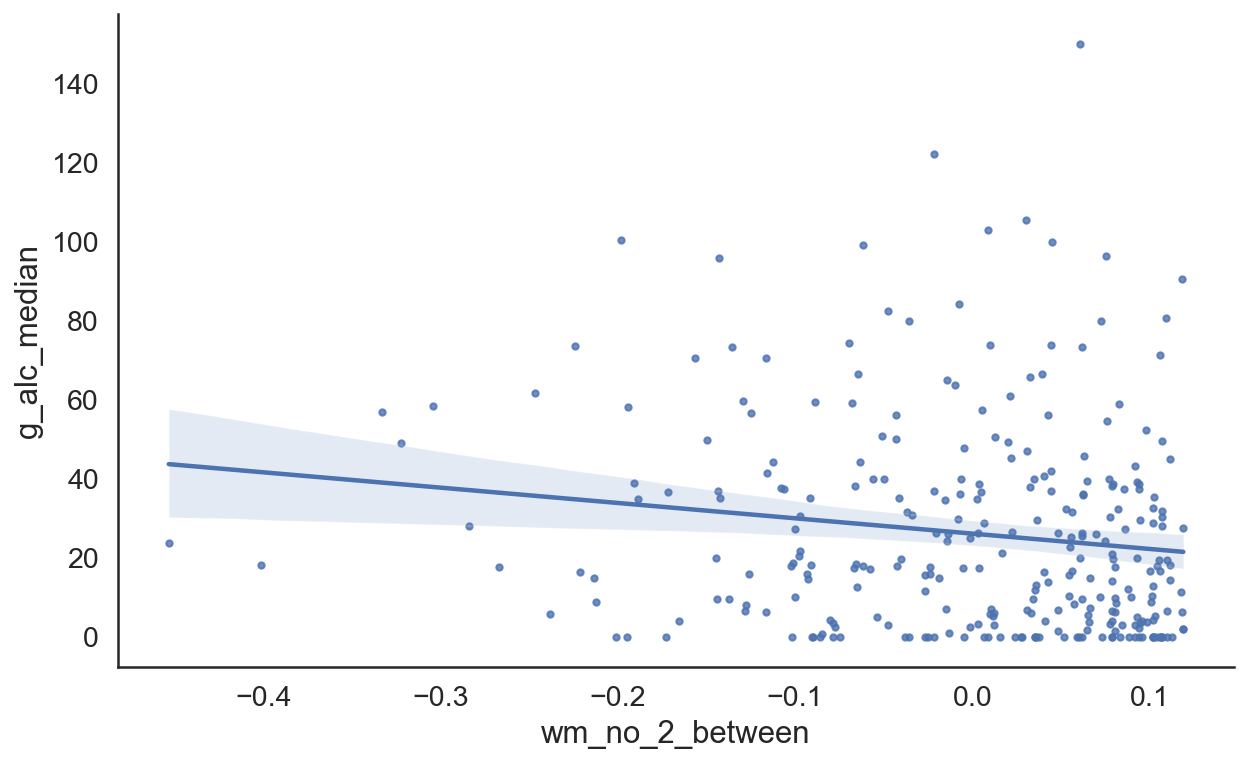

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_no_2_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM encoding and consumption

In [ ]:
lmer_within_between('wm_encoding_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_encoding_within + wm_encoding_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 4506

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5505 -0.3909 -0.0776  0.3964  8.7121 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6198   0.7873  
 Residual                0.3182   0.5641  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         -4.786e-02  4.876e-02  2.924e+02  -0.982 0.327139    
wm_encoding_within  -7.918e-03  1.200e-02  1.932e+03  -0.660 0.509511    
wm_encoding_between -1.695e-01  4.706e-02  2.949e+02  -3.601 0.000372 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_ncdng_w
wm_ncdng_wt 0.000            
wm_ncdng_

(-0.0079177520889842, 0.5095109824013941)

<AxesSubplot:xlabel='wm_encoding_between', ylabel='g_alc_median'>

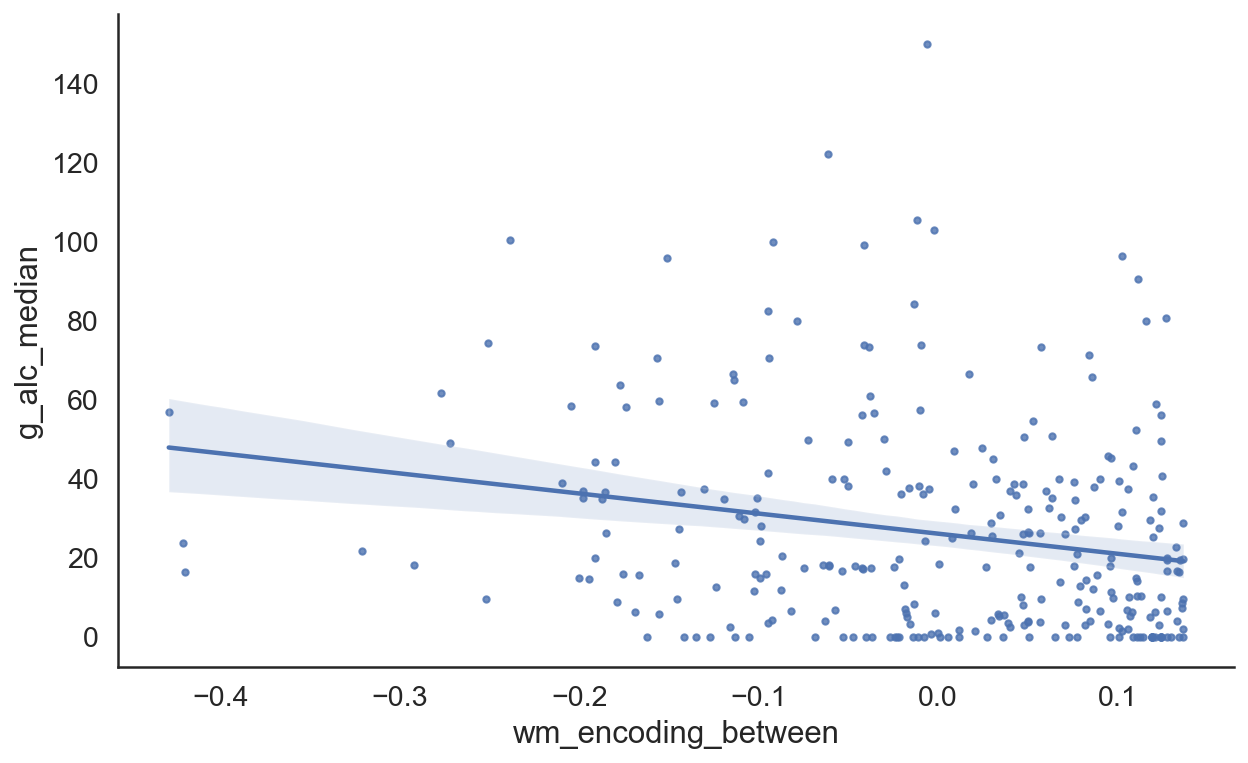

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_encoding_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM delayed encoding and consumption

In [ ]:
lmer_within_between('wm_delayed_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_delayed_within + wm_delayed_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 4510.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5698 -0.3967 -0.0809  0.4025  8.7292 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6270   0.7919  
 Residual                0.3184   0.5643  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)        -4.618e-02  4.902e-02  2.909e+02  -0.942   0.3469   
wm_delayed_within   1.838e-03  1.201e-02  1.931e+03   0.153   0.8783   
wm_delayed_between -1.454e-01  4.875e-02  2.889e+02  -2.983   0.0031 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_dlyd_w
wm_dlyd_wth 0.000           
wm_dlyd_btw 0.012  

(0.0018380949364735655, 0.8783353346800389)

<AxesSubplot:xlabel='wm_delayed_between', ylabel='g_alc_median'>

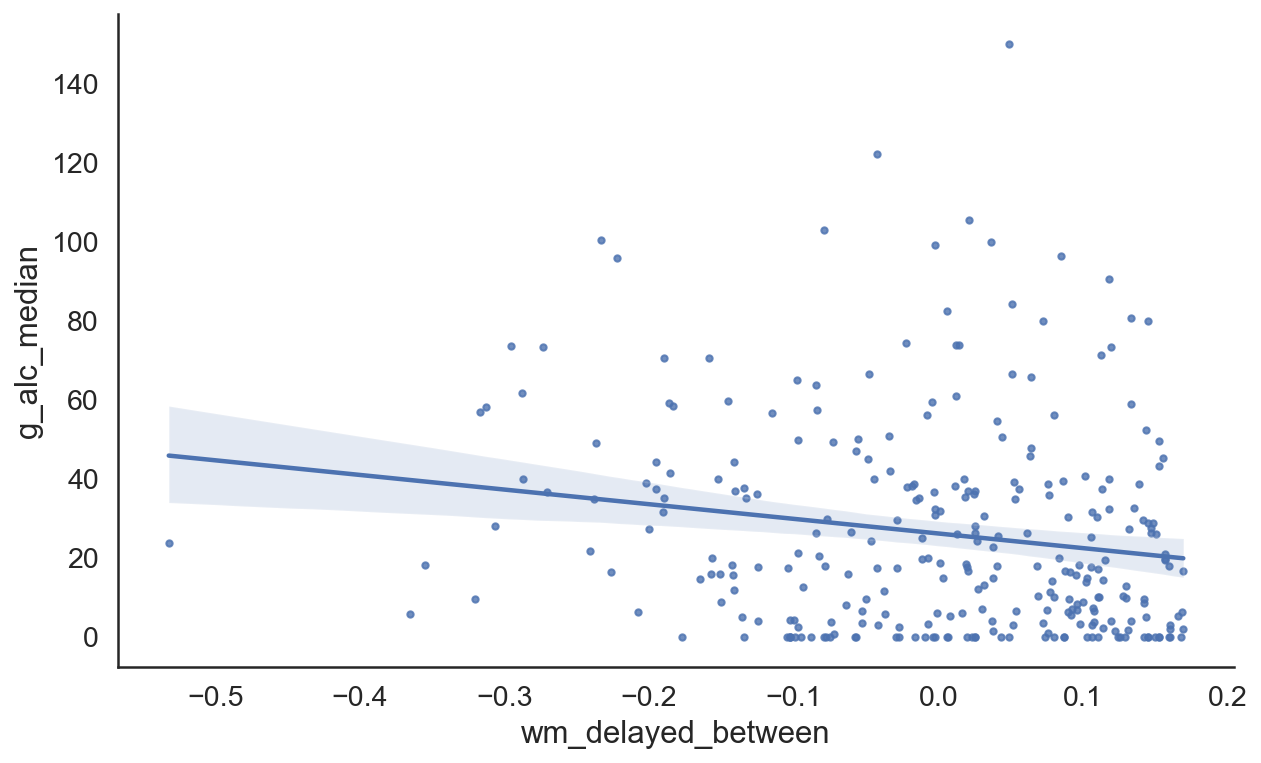

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_delayed_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and consumption

In [ ]:
lmer_within_between('ssrt_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 4513.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5708 -0.4002 -0.0737  0.3925  8.7089 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6329   0.7955  
 Residual                0.3185   0.5644  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
               Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)  -5.146e-02  4.931e-02  2.891e+02  -1.044   0.2975  
ssrt_within  -2.967e-03  1.201e-02  1.929e+03  -0.247   0.8049  
ssrt_between  1.121e-01  4.683e-02  3.022e+02   2.394   0.0173 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.059  0.000


(-0.002966696866852141, 0.8048866022273538)

In [ ]:
lmer_within_between('ssrt_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 4513.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5708 -0.4002 -0.0737  0.3925  8.7089 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6329   0.7955  
 Residual                0.3185   0.5644  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
               Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)  -5.146e-02  4.931e-02  2.891e+02  -1.044   0.2975  
ssrt_within  -2.967e-03  1.201e-02  1.929e+03  -0.247   0.8049  
ssrt_between  1.121e-01  4.683e-02  3.022e+02   2.394   0.0173 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.059  0.000


(-0.002966696866852141, 0.8048866022273538)

<AxesSubplot:xlabel='ssrt_between', ylabel='g_alc_median'>

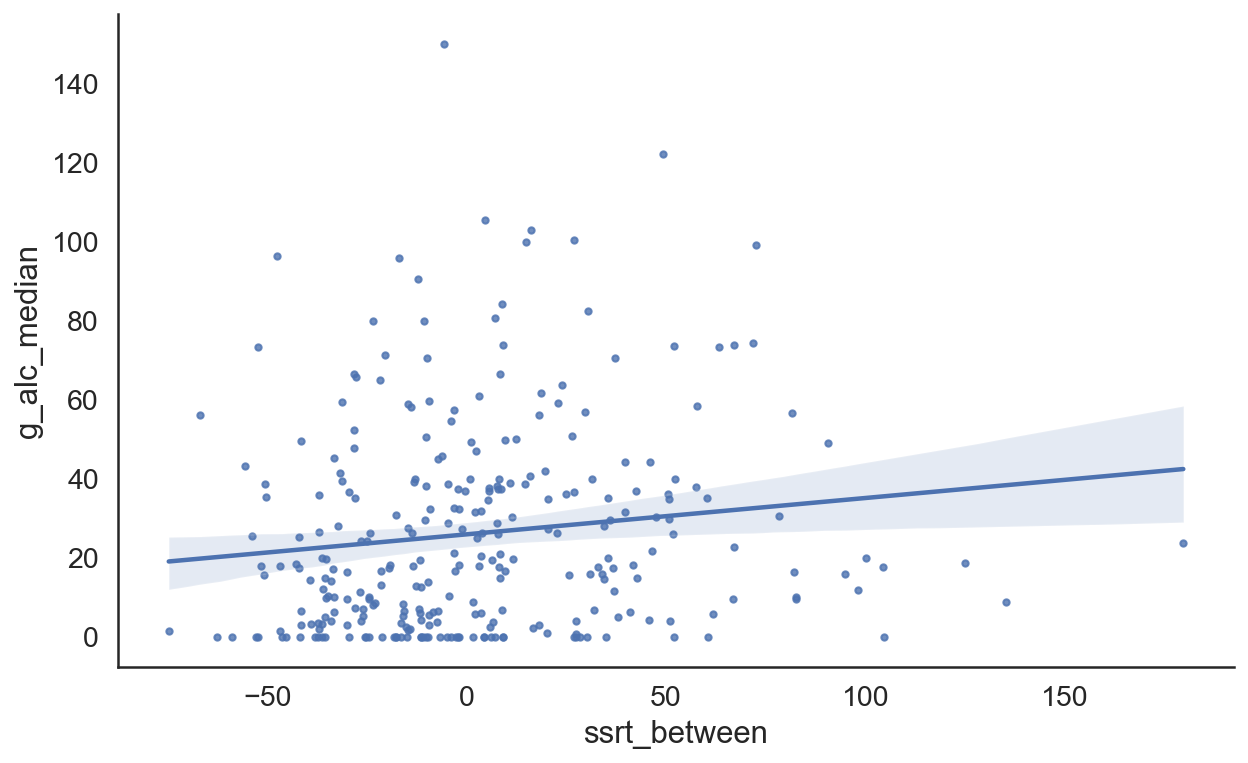

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and loss of control

In [ ]:
lmer_within_between('ssrt_within', 'control_mean',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: control_mean ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 4519.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9127 -0.4682 -0.0940  0.4012  4.8116 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6719   0.8197  
 Residual                0.3169   0.5629  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
              Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  3.693e-03  5.067e-02 2.866e+02   0.073    0.942
ssrt_within  9.541e-03  1.198e-02 1.926e+03   0.797    0.426
ssrt_between 1.162e-02  4.810e-02 2.990e+02   0.242    0.809

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.059  0.000


(0.009541169460549188, 0.4257913722007881)

In [ ]:
lmer_within_between('ssrt_within', 'control_mean',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: control_mean ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 4519.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9127 -0.4682 -0.0940  0.4012  4.8116 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6719   0.8197  
 Residual                0.3169   0.5629  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
              Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  3.693e-03  5.067e-02 2.866e+02   0.073    0.942
ssrt_within  9.541e-03  1.198e-02 1.926e+03   0.797    0.426
ssrt_between 1.162e-02  4.810e-02 2.990e+02   0.242    0.809

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.059  0.000


(0.009541169460549188, 0.4257913722007881)

<AxesSubplot:xlabel='ssrt_within', ylabel='control_mean'>

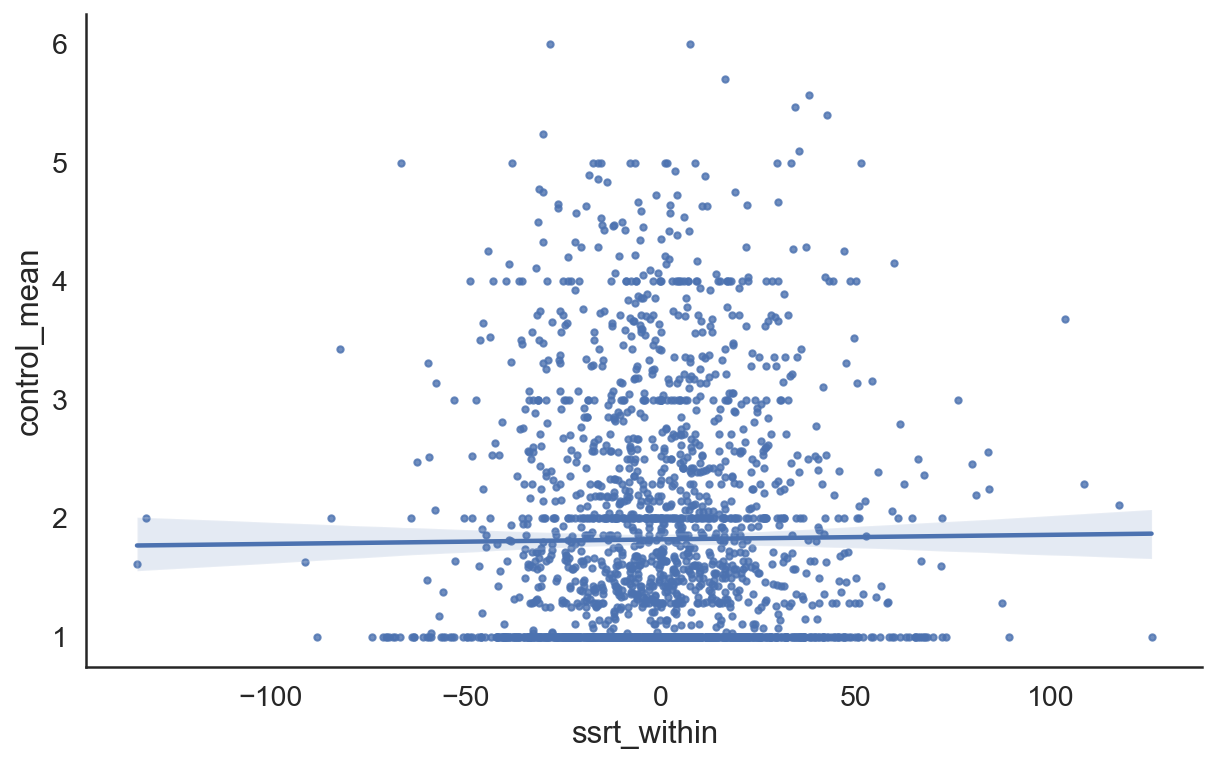

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_within', y = 'control_mean', data = cor2_d,scatter_kws={'s':10})

Text(0.5, 0, 'SSRT within')

<Figure size 720x432 with 0 Axes>

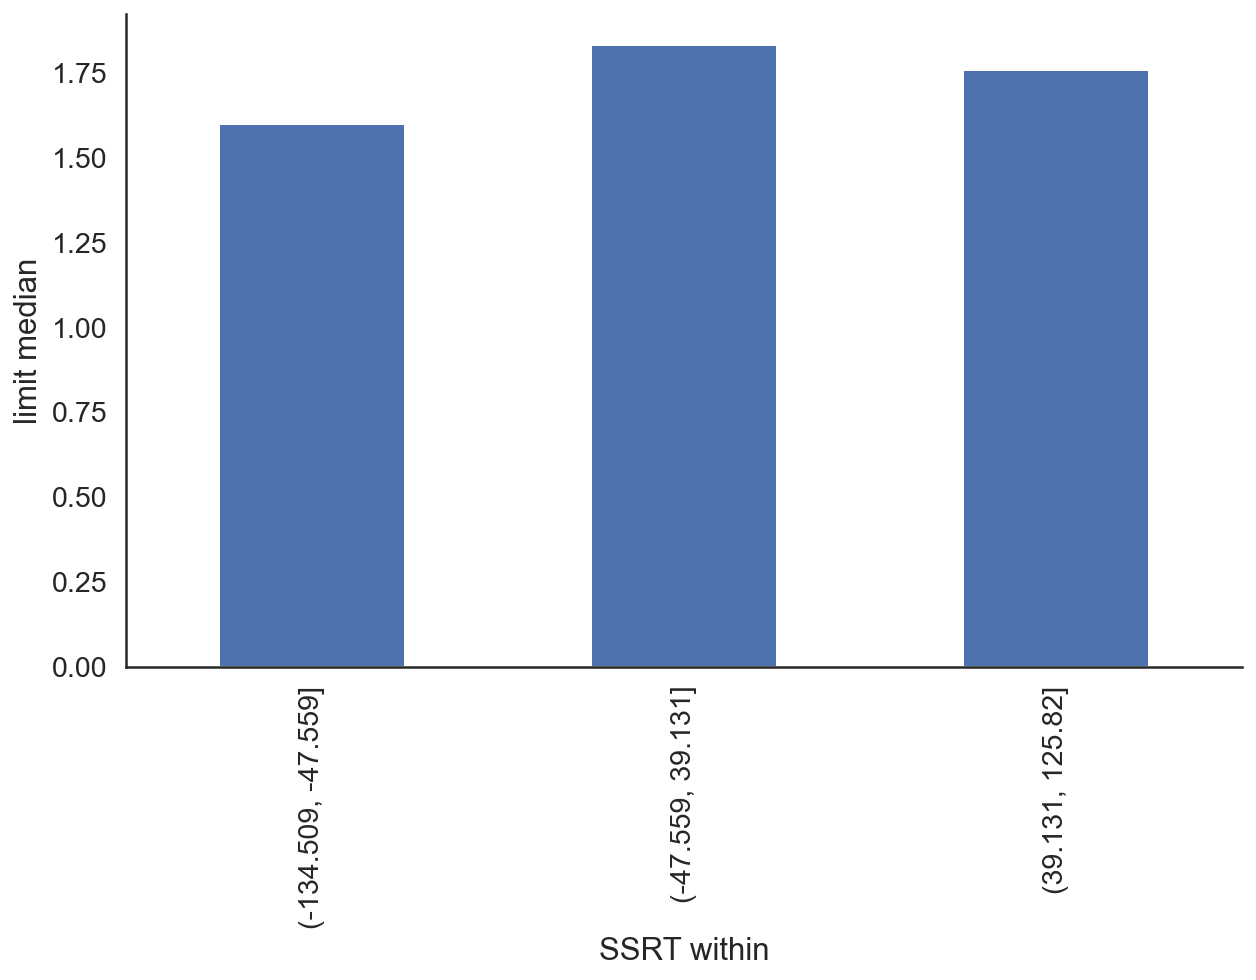

In [ ]:
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ssrt_within, 3)
ax = cor2_d.groupby('limit_binned').control_mean.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('SSRT within')


2210


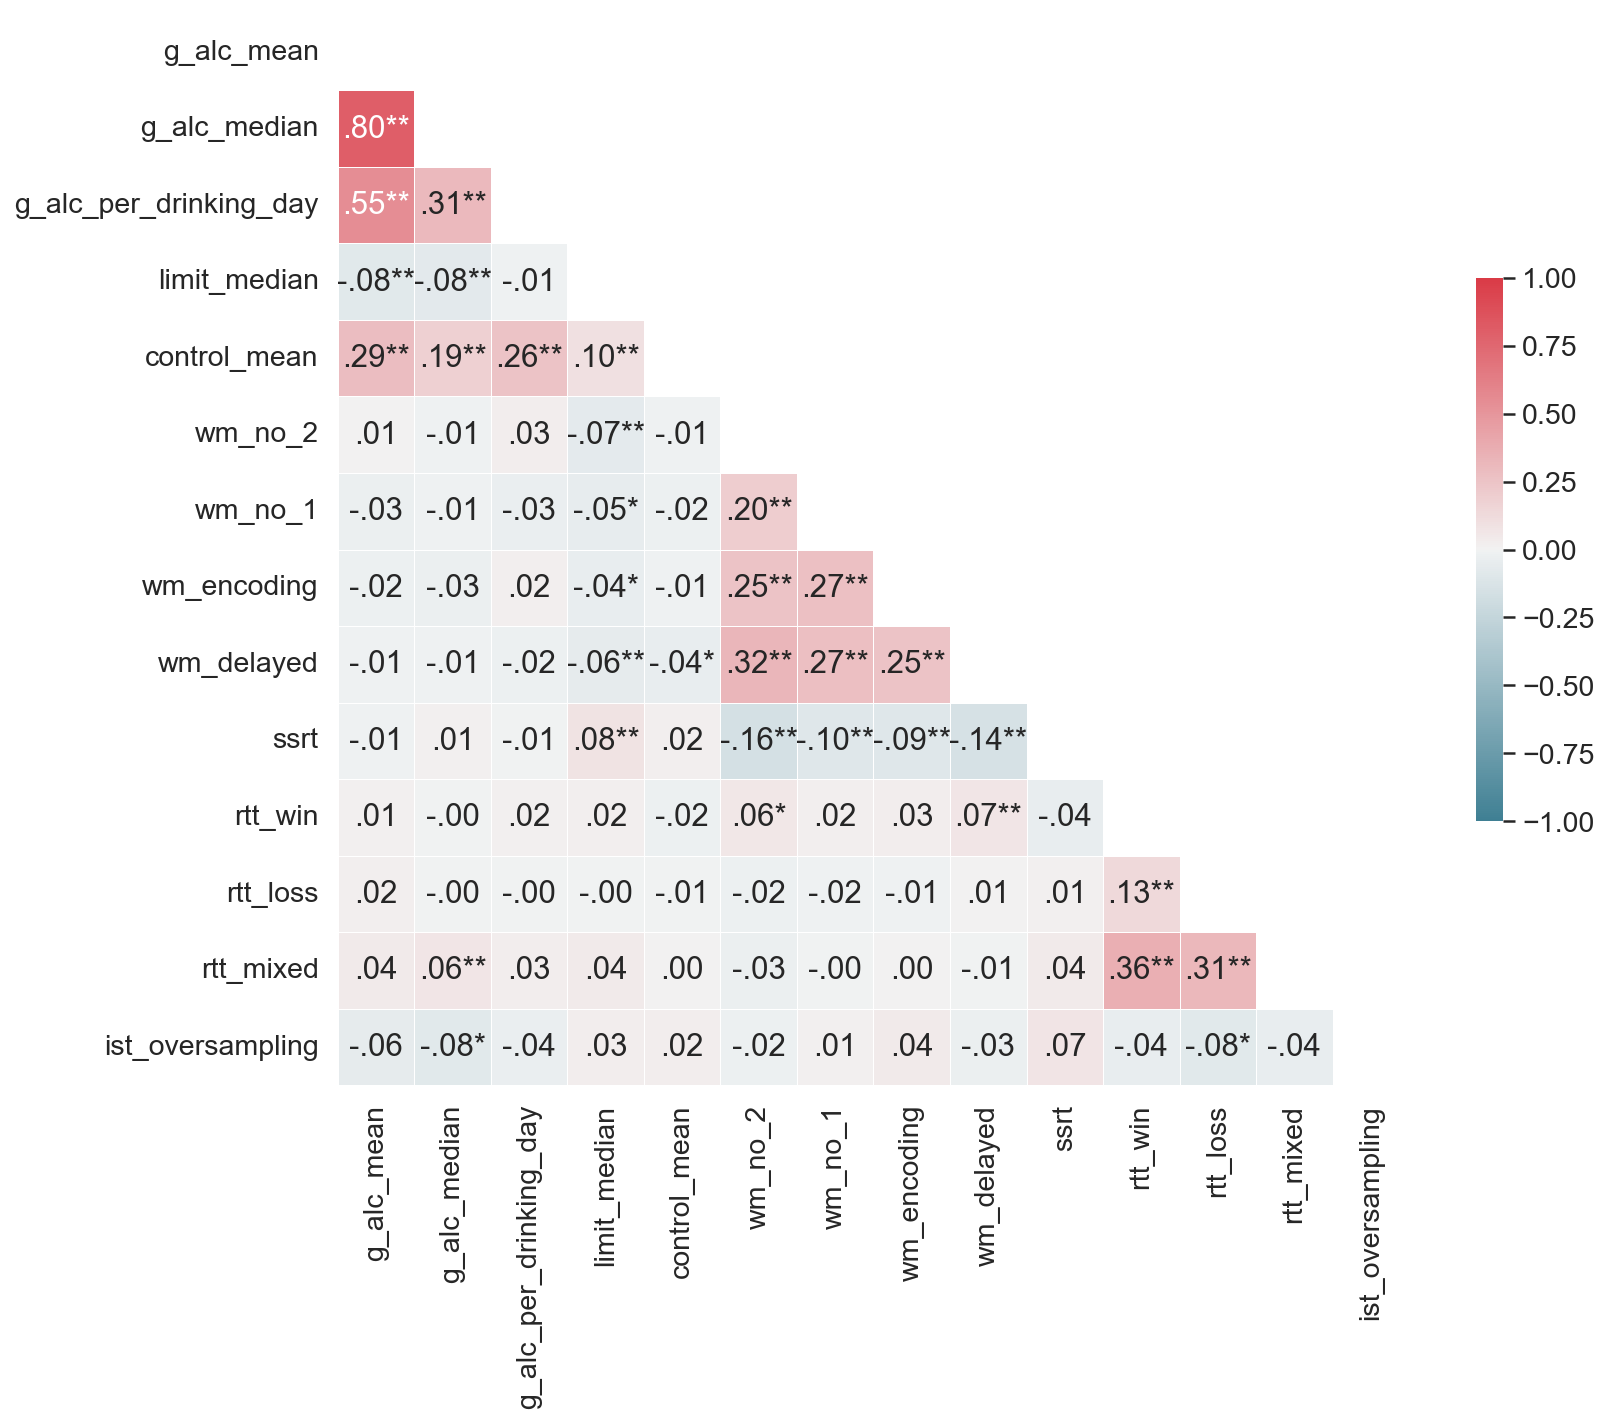

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.reset_index().drop(columns = ['session_number']), corr_func = lmer, size = (12, 10))

In [ ]:
cor.limit_median.value_counts()

#### Intention and drinking

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

R[write to console]: Lade nötiges Paket: lmer



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: wm_no_2 ~ as.factor(limit_median) + (1 | participant)
   Data: cor

REML criterion at convergence: -3721

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5213 -0.4500  0.2059  0.5188  2.8531 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.008668 0.09310 
 Residual                0.008181 0.09045 
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                 8.805e-01  6.658e-03  4.036e+02 132.259  < 2e-16
as.factor(limit_median)0.5 -2.350e-02  3.928e-02  1.990e+03  -0.598 0.549760
as.factor(limit_median)1   -1.349e-02  6.722e-03  2.204e+03  -2.006 0.044972
as.factor(limit_median)1.5 -3.354e-02  2.966e-02  2.041e+03  -1.131 0.258254
as.factor(limit_median)2   -2.317e-02  6.992e-03  2.200e+03  -3.313 0.000937
                           

#### intention as factor

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

R[write to console]: Lade nötiges Paket: lmer



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: wm_no_2 ~ as.factor(limit_median) + (1 | participant)
   Data: cor

REML criterion at convergence: -3721

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5213 -0.4500  0.2059  0.5188  2.8531 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.008668 0.09310 
 Residual                0.008181 0.09045 
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                 8.805e-01  6.658e-03  4.036e+02 132.259  < 2e-16
as.factor(limit_median)0.5 -2.350e-02  3.928e-02  1.990e+03  -0.598 0.549760
as.factor(limit_median)1   -1.349e-02  6.722e-03  2.204e+03  -2.006 0.044972
as.factor(limit_median)1.5 -3.354e-02  2.966e-02  2.041e+03  -1.131 0.258254
as.factor(limit_median)2   -2.317e-02  6.992e-03  2.200e+03  -3.313 0.000937
                           

### Cross-sectional effects based on longitudinal data

288


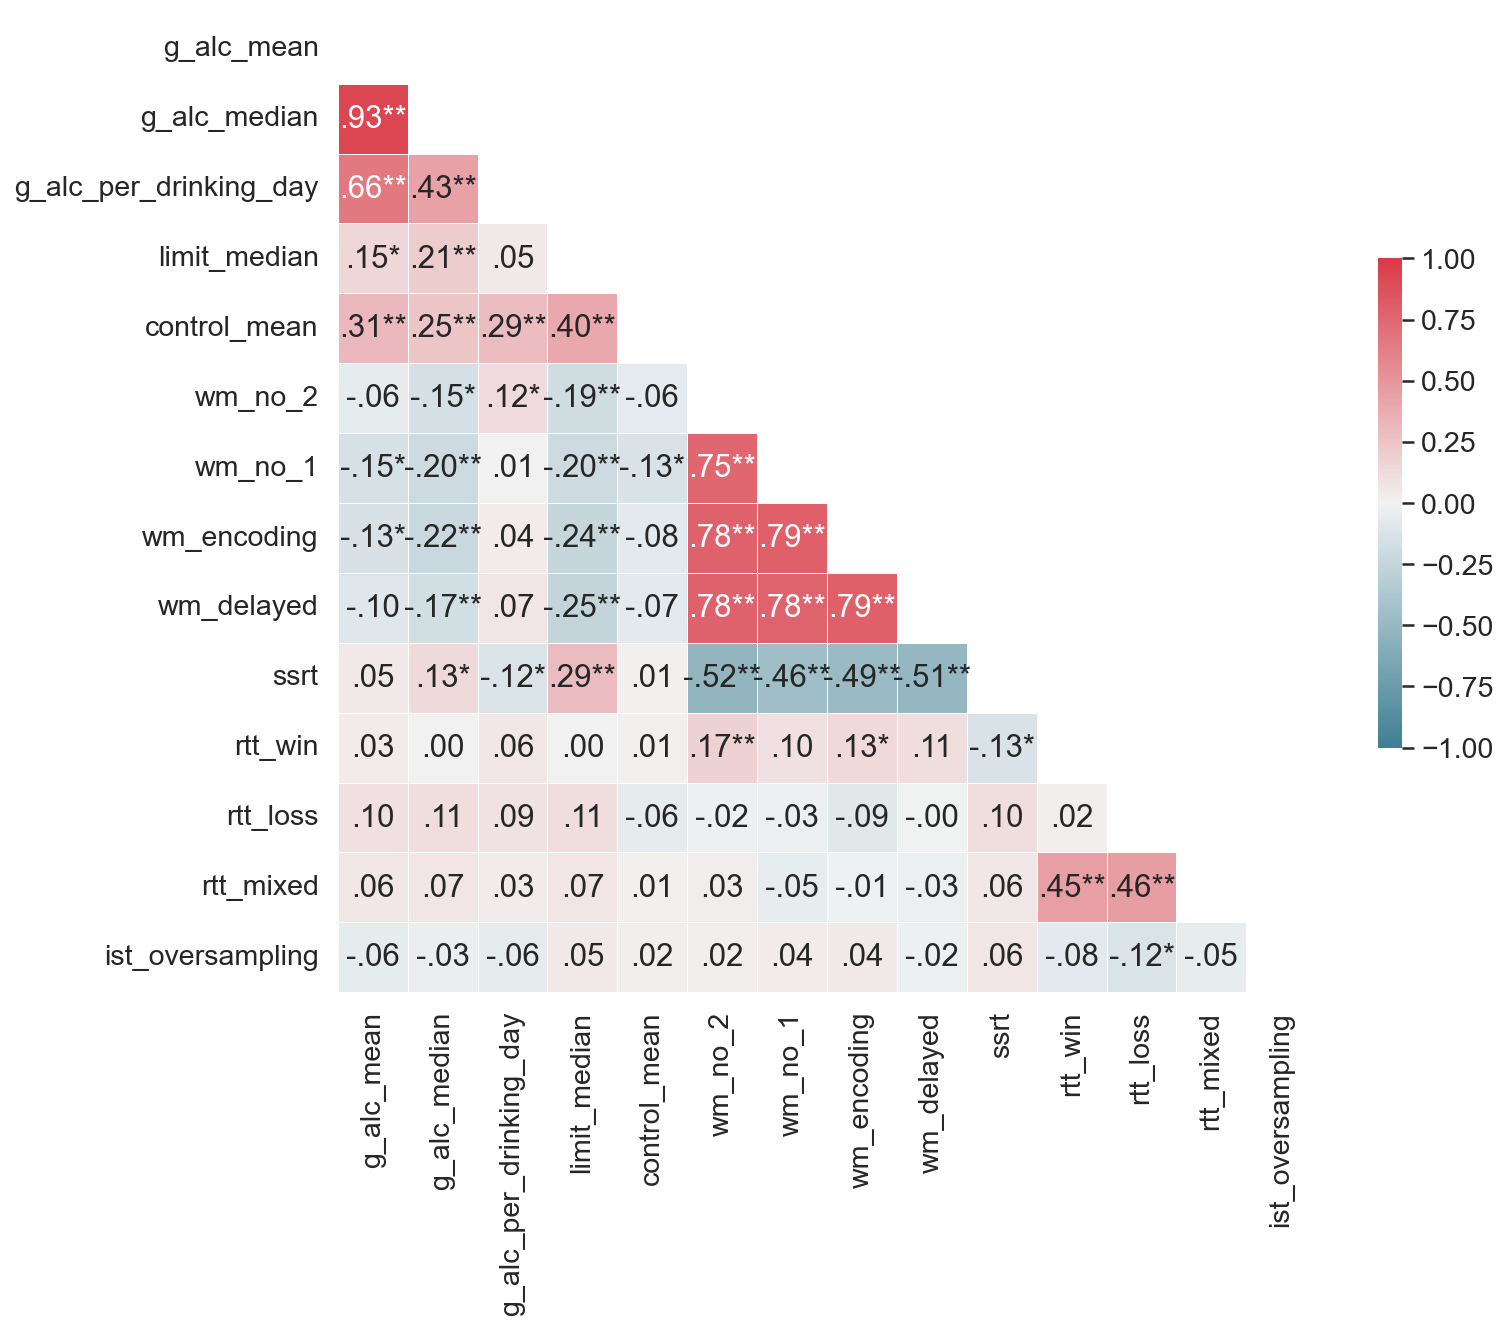

In [ ]:
correlation_matrix(cor.groupby('participant').mean().reset_index().drop(columns = ['session_number']))

### Average longitudinal correlation per participant

In [ ]:
pps = cor.participant.unique()

In [ ]:
cor.groupby('participant').corr().reset_index().groupby('level_1').mean()

,g_alc_mean,g_alc_median,g_alc_per_drinking_day,limit_median,control_mean,wm_no_2,wm_no_1,wm_encoding,wm_delayed,session_number,ssrt,rtt_win,rtt_loss,rtt_mixed,ist_oversampling
level_1,,,,,,,,,,,,,,,
control_mean,0.270544,0.179046,0.230628,0.080986,1.000000,-0.001538,-0.006739,-0.013882,-0.089216,-0.109097,-0.004270,-0.026856,0.044973,-0.012790,0.058399
g_alc_mean,1.000000,0.784208,0.601557,-0.114361,0.270544,0.030124,-0.008661,-0.029958,-0.038250,-0.043421,0.020861,0.009307,0.010400,0.042926,0.025684
g_alc_median,0.784208,1.000000,0.333380,-0.106809,0.179046,0.002817,0.045115,-0.052508,-0.026121,-0.025423,0.017228,0.000879,-0.020949,0.053113,-0.005223
g_alc_per_drinking_day,0.601557,0.333380,1.000000,-0.001402,0.230628,0.011073,-0.044882,0.014119,-0.033089,-0.046930,0.019372,0.005570,-0.031943,0.038504,0.011152
ist_oversampling,0.025684,-0.005223,0.011152,-0.011244,0.058399,0.000067,0.006480,-0.001764,-0.033291,-0.139698,0.016835,0.006767,-0.005250,-0.028260,1.000000
limit_median,-0.114361,-0.106809,-0.001402,1.000000,0.080986,-0.087065,-0.043962,-0.016933,-0.041622,-0.095999,0.044225,0.005814,-0.013519,0.028862,-0.011244
rtt_loss,0.010400,-0.020949,-0.031943,-0.013519,0.044973,-0.034882,-0.001189,-0.032713,-0.018017,-0.059311,-0.037189,0.079236,1.000000,0.185594,-0.005250
rtt_mixed,0.042926,0.053113,0.038504,0.028862,-0.012790,-0.070018,0.014248,-0.012292,0.003811,-0.060835,0.029194,0.185765,0.185594,1.000000,-0.028260
rtt_win,0.009307,0.000879,0.005570,0.005814,-0.026856,0.027199,0.022675,0.007636,0.053354,0.004238,-0.026388,1.000000,0.079236,0.185765,0.006767


In [ ]:
#cor.groupby('participant').corr().drop(columns=['session_number']).unstack()[['g_alc']].hist(figsize=(12,48), layout = (12,2), sharex=True);

## Factor score correlations

In [ ]:
factor_loadings = np.array([[ 7.92661829e-01,  4.78790772e-02,  4.86401575e-03],
       [ 7.63220032e-01, -1.40617072e-02,  3.25907524e-04],
       [ 7.49311048e-01, -2.53512341e-02, -1.37956558e-02],
       [ 8.18257813e-01,  1.04559605e-02, -9.31641296e-03],
       [ 4.63416842e-01, -7.38915150e-02,  1.43192654e-01],
       [ 1.79143311e-02, -2.67090047e-02,  8.60738590e-01],
       [ 7.90922395e-03,  9.98916460e-01, -1.35399086e-02],
       [-1.02745794e-01,  3.35920712e-01,  3.78108731e-01],
       [-7.42983269e-02, -1.32799950e-01, -6.17402248e-02]])

In [ ]:
import warnings
import numpy as np
from sklearn.preprocessing import scale

def matrix_sqrt(x):
    """
    Compute the square root of the eigen values (eVal),
    and then take $eVec * diag(eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    evals[evals < 0] = np.finfo(float).eps
    sqrt_evals = np.sqrt(evals)
    return evecs.dot(np.diag(sqrt_evals)).dot(evecs.T)


def inv_matrix_sqrt(x):
    """
    Compute the inverse square root of the eigen values (eVal),
    and then take $eVec * diag(1 / eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    if np.iscomplex(evals).any():
        warnings.warn('Complex eigen values detected; results are suspect.')
        return x
    evals[evals < np.finfo(float).eps] = 100 * np.finfo(float).eps
    inv_sqrt_evals =  1 / np.sqrt(evals)
    return evecs.dot(np.diag(inv_sqrt_evals)).dot(evecs.T)


def ten_berge(X, loadings, phi=None):
    """
    Estimate factor scores using the "ten Berge" method.

    Parameters
    ----------
    X : array-like
        The data set
    loadings : array-like
        The loadings matrix

    Reference
    ----------
    https://www.sciencedirect.com/science/article/pii/S0024379597100076
    """
    # get the number of factors from the loadings
    n_factors = loadings.shape[1]
    corr = np.corrcoef(X, rowvar=False)
    # if `phi` is None, create a diagonal matrix
    phi = np.diag(np.ones(n_factors)) if phi is None else phi
    # calculate intermediate metrics
    load = loadings.dot(matrix_sqrt(phi))
    corr_inv = inv_matrix_sqrt(corr)
    temp = corr_inv.dot(load)\
                   .dot(inv_matrix_sqrt(load.T.dot(np.linalg.inv(corr))
                                              .dot(load)))
    # calcualte weights
    weights = corr_inv.dot(temp)\
                      .dot(matrix_sqrt(phi))
    # calculate scores, given weights
    scores = scale(X).dot(weights)
    return scores

In [ ]:
tasks_session = tasks.set_index(['participant','session_number'])
tasks_session['ssrt'] = -tasks_session.ssrt

In [ ]:
import pickle
with open('../data/interim/fa.pkl', 'rb') as f:
    fa = pickle.load(f)

In [ ]:
factor_scores = pd.DataFrame(ten_berge(tasks_session, fa.loadings_))
factor_scores.columns = ['Factor_1','Factor_2','Factor_3']
factor_scores = pd.concat([tasks_session.reset_index(),factor_scores],axis = 1)
factor_scores['gbe_index'] = factor_scores.participant + '_' + factor_scores.session_number.apply(lambda x: '%03d'%int(x))

In [ ]:
factor_scores

,participant,session_number,wm_no_2,wm_no_1,wm_encoding,wm_delayed,ssrt,rtt_win,rtt_loss,rtt_mixed,ist_oversampling,Factor_1,Factor_2,Factor_3,gbe_index
0,b001,3.0,0.901524,0.913507,0.981607,0.970906,-335.001228,0.235019,0.656363,0.195450,0.247891,0.835128,0.850918,-1.403543,b001_003
1,b001,7.0,0.968921,0.977022,0.981607,0.970906,-308.936763,0.235019,0.184567,0.327083,0.402424,1.064929,-0.868439,-1.196086,b001_007
2,b001,9.0,0.858401,0.977022,0.981607,0.970906,-368.084691,0.235019,0.127451,0.195450,0.499008,0.740834,-1.060924,-1.412006,b001_009
3,b001,11.0,0.858401,0.977022,0.981607,0.970906,-354.723832,0.660447,0.127451,0.195450,0.499008,0.728429,-1.087629,0.004933,b001_011
4,b001,12.0,0.968921,0.870825,0.882271,0.874185,-355.098967,0.373672,0.184567,0.398926,0.363791,0.331585,-0.804702,-0.805008,b001_012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,m290,5.0,0.735983,0.952352,0.957109,0.812765,-444.293763,0.843941,0.686833,0.701965,-1.018706,-0.152938,0.892743,0.511941,m290_005
2476,m290,6.0,0.785624,0.952352,0.957109,0.669386,-323.506189,0.218442,0.099346,0.558234,-1.038023,-0.131385,-1.145762,-0.986585,m290_006
2477,m290,10.0,0.833472,0.827768,0.686391,0.932914,-337.262486,0.780355,0.411423,0.558234,-1.038023,-0.196262,-0.078675,0.710739,m290_010
2478,m290,4.0,0.735983,0.827768,0.835940,0.932914,-341.296886,0.218442,0.212252,0.337939,-0.980073,-0.097087,-0.740092,-1.212942,m290_004


In [ ]:
correlation_matrix(factor_scores.drop(columns = ['session_number','gbe_index']))

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)

### Based on mixed models

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)


In [ ]:
def lmer_within_between(x, y, df, model_output = False): 
    if '_'.join(x.split('_')[:-1]) == y:
        return np.nan, np.nan
                
    if ('within' in x+y) and ('between' in x+y):
        return np.nan,np.nan # These should be nan
    if ('between' in y) or('within' in y):
        return np.nan,np.nan
    if 'within' in x:
        x_control = '_'.join(x.split('_')[:-1])+'_between'
    #elif 'between' in x:
    #    return np.nan, np.nan
        #x_control = '_'.join(x.split('_')[:-1])+'_within'
    else:
        return lmer(x,y,df)
    
    if model_output:
        model_output = 'print(summary(m))'
    else:
        model_output = ''
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + %(x_control)s + (1 | participant), data=df, na.action = na.exclude) 
    %(model_output)s
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[14]
    """%{'x':x,'x_control':x_control,'y':y,'model_output':model_output},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]
         


In [ ]:
#def lmer(x, y, df):    
#    R = biuR.wrapper.R()
#    p = R("""
#    library(lmerTest)
#    library(ggeffects)
#    # Running the model
#    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
#    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
#    estimate = summary(m)$coefficients[2]
#    p_value = summary(m)$coefficients[10]
#    """%{'x':x,'y':y},push=dict(df=df))
#    
#    
#    m = R("""m""")
#    estimate = R("""estimate""")
#    p_value = R("""p_value""")
#
#    return estimate[0], p_value[0]

2210


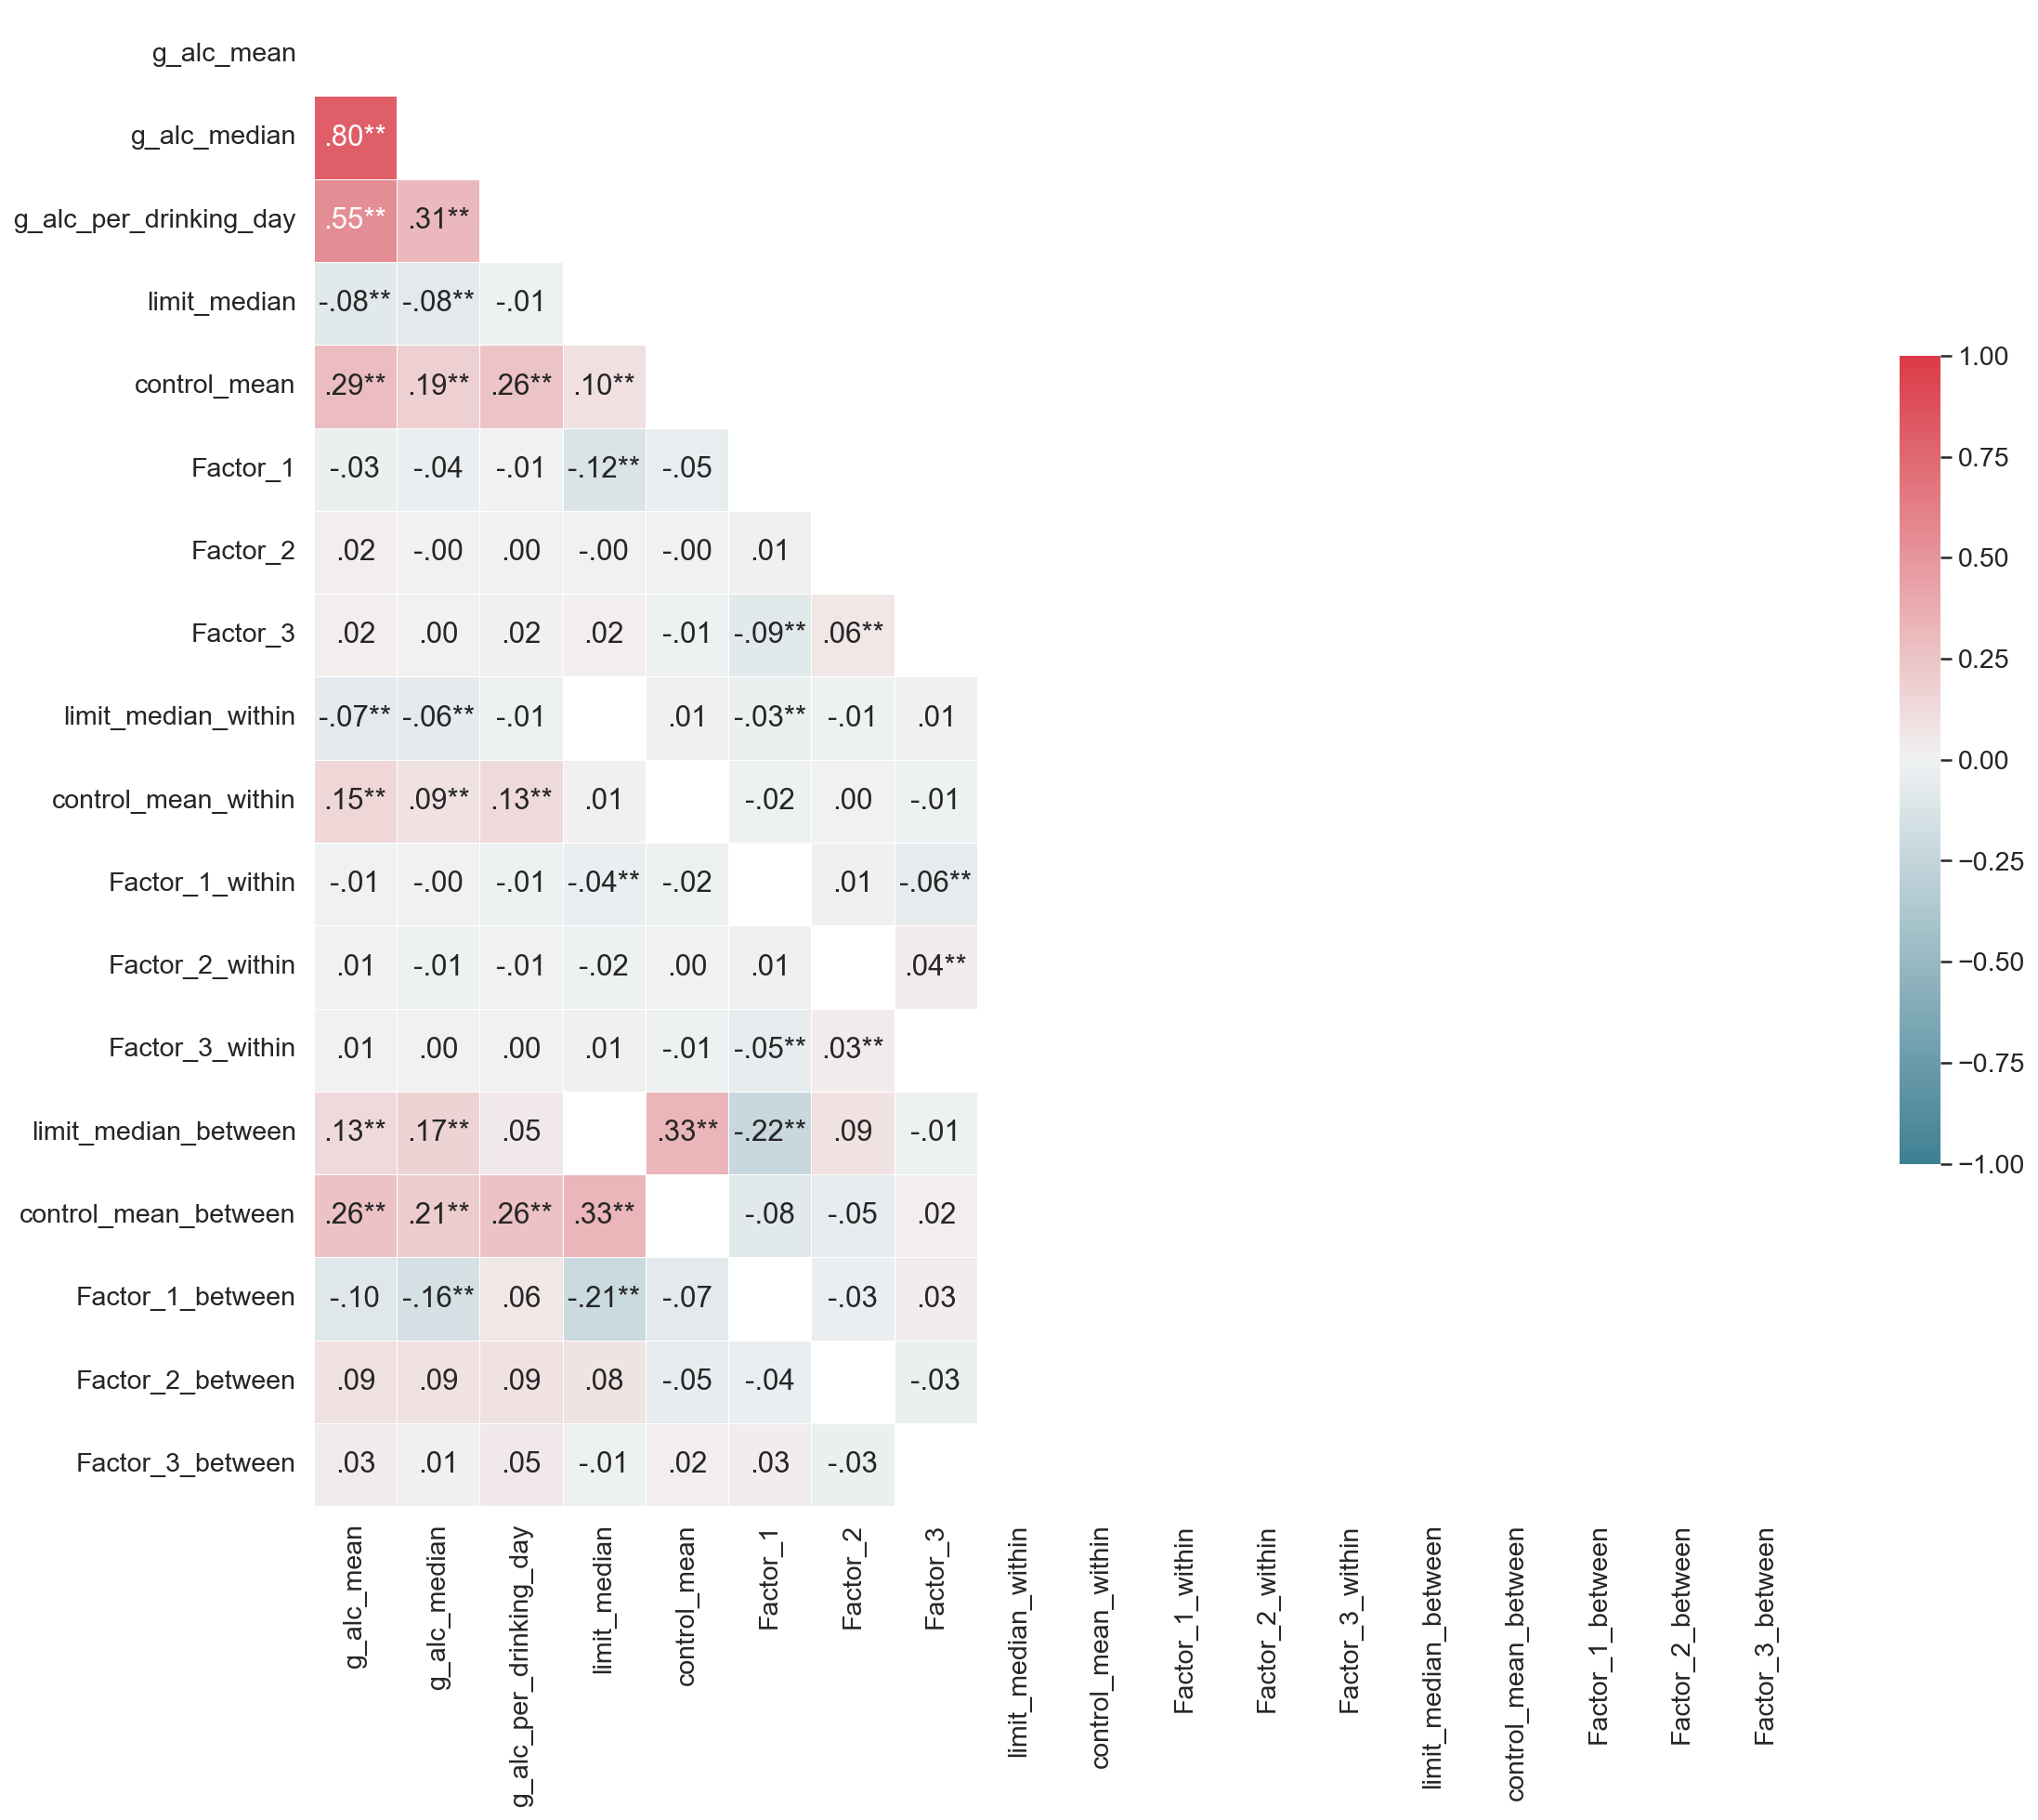

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3 = decompose_within_between(cor3.reset_index(),columns = columns, result='both', drop = False).set_index('participant')
cor3 = (cor3-cor3.mean())/cor3.std()
correlation_matrix(cor3.reset_index(), corr_func = lmer_within_between, size = (18,16))

#### Intention and consumption

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3_d = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3_d = decompose_within_between(cor3_d.reset_index(),columns = columns, result='both', drop = False).set_index('participant')

In [ ]:
lmer_within_between('limit_median_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ limit_median_within + limit_median_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 4476.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5915 -0.4071 -0.0772  0.3941  8.5519 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6165   0.7852  
 Residual                0.3136   0.5600  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            -0.04950    0.04862  289.94362  -1.018 0.309512    
limit_median_within    -0.06491    0.01192 1929.86909  -5.447 5.77e-08 ***
limit_median_between    0.17000    0.04633  303.95765   3.669 0.000287 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) lmt_mdn_w
lmt_mdn_wth  0.000          
lmt

(-0.06490712178817196, 5.7702317785746905e-08)

<AxesSubplot:xlabel='limit_median_between', ylabel='g_alc_median'>

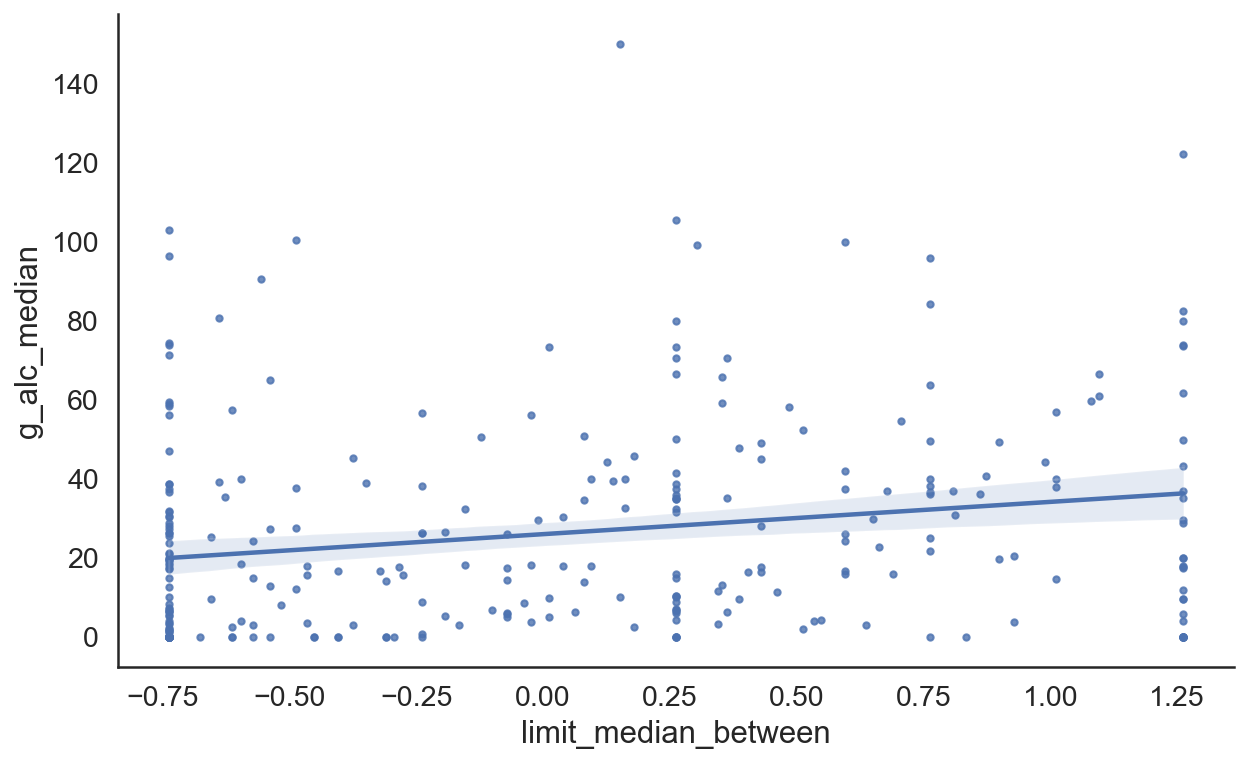

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

<AxesSubplot:xlabel='limit_median_within', ylabel='g_alc_median'>

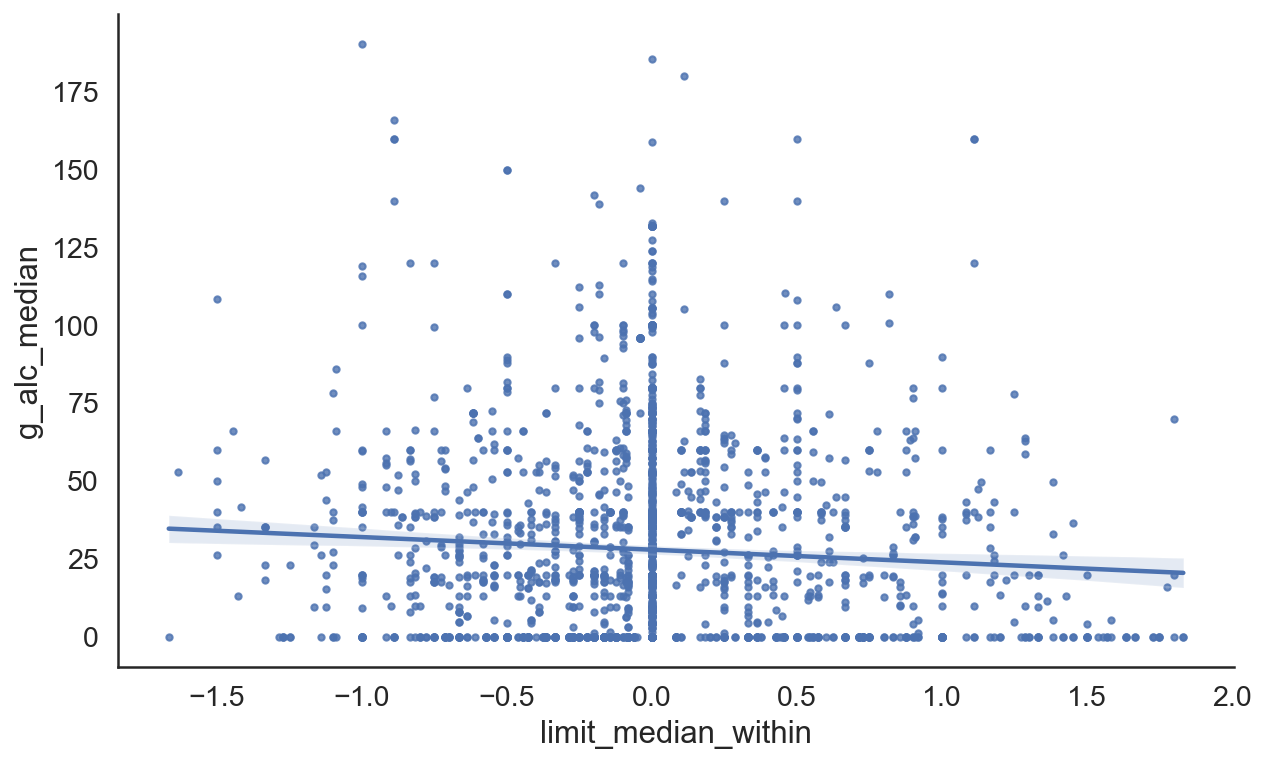

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'limit median')

<Figure size 720x432 with 0 Axes>

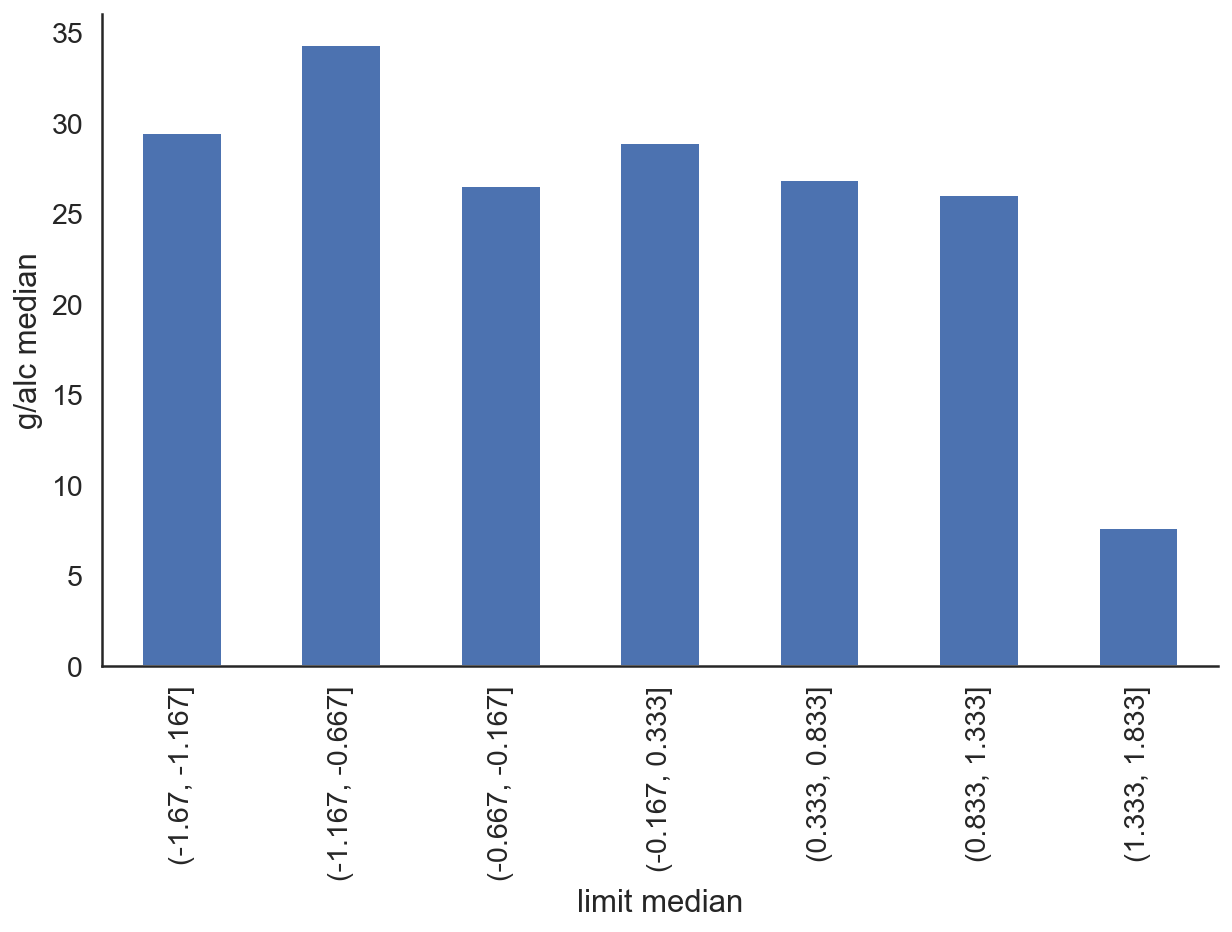

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.limit_median_within, 7)
ax = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('limit median')


#### Perceived control and consumption

In [ ]:
lmer_within_between('control_mean_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ control_mean_within + control_mean_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 4440.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8813 -0.4271 -0.0481  0.3864  9.0330 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6069   0.7791  
 Residual                0.3085   0.5555  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            -0.04550    0.04823  290.63127  -0.944    0.346    
control_mean_within     0.09281    0.01182 1930.39752   7.853 6.70e-15 ***
control_mean_between    0.20692    0.04814  290.80460   4.298 2.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) cntrl_mn_w
cntrl_mn_wt  0.000           
c

(0.09280512826811618, 6.697389424385168e-15)

<AxesSubplot:xlabel='control_mean_between', ylabel='g_alc_median'>

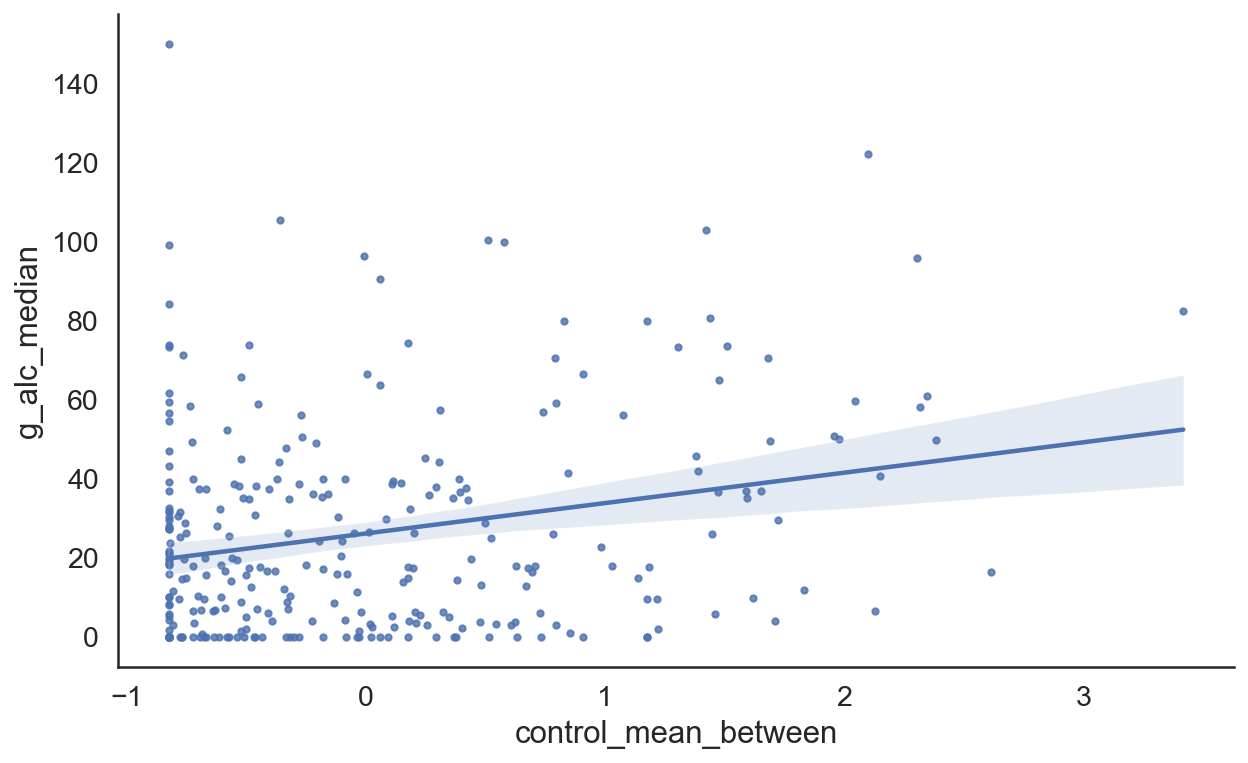

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

<AxesSubplot:xlabel='control_mean_within', ylabel='g_alc_median'>

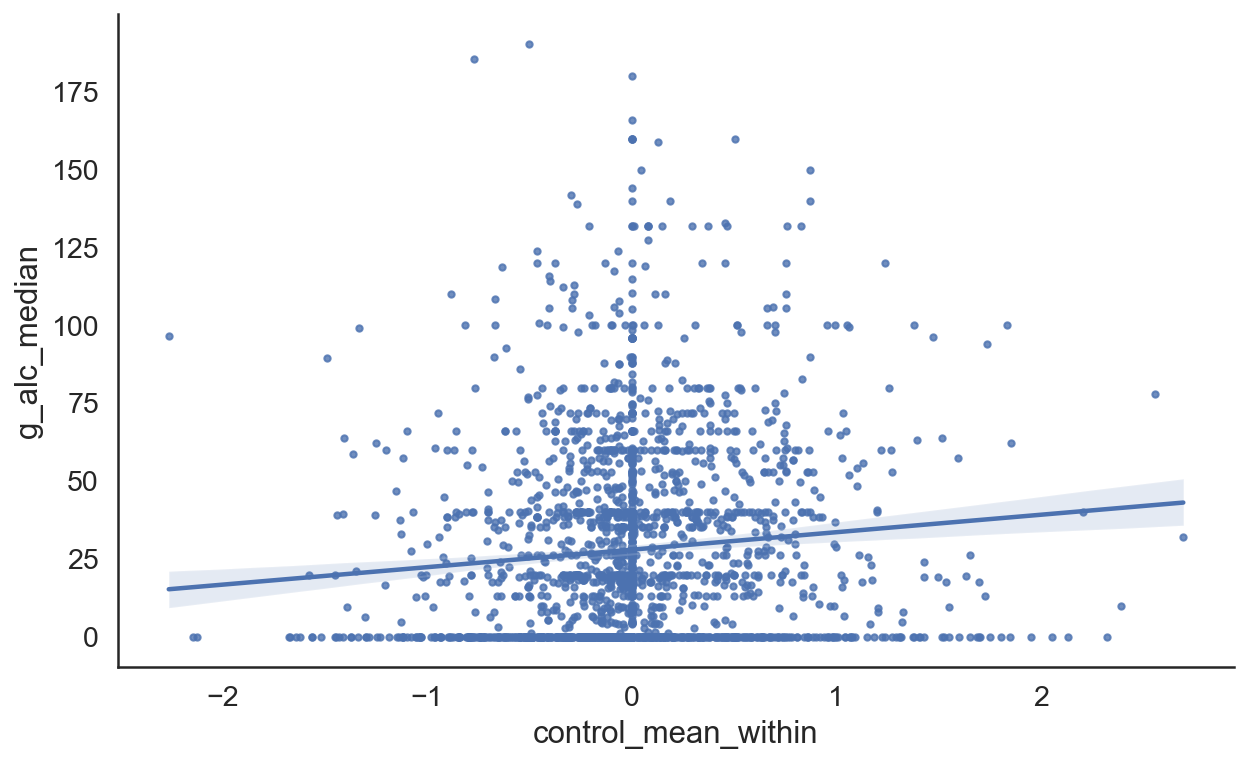

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'control')

<Figure size 720x432 with 0 Axes>

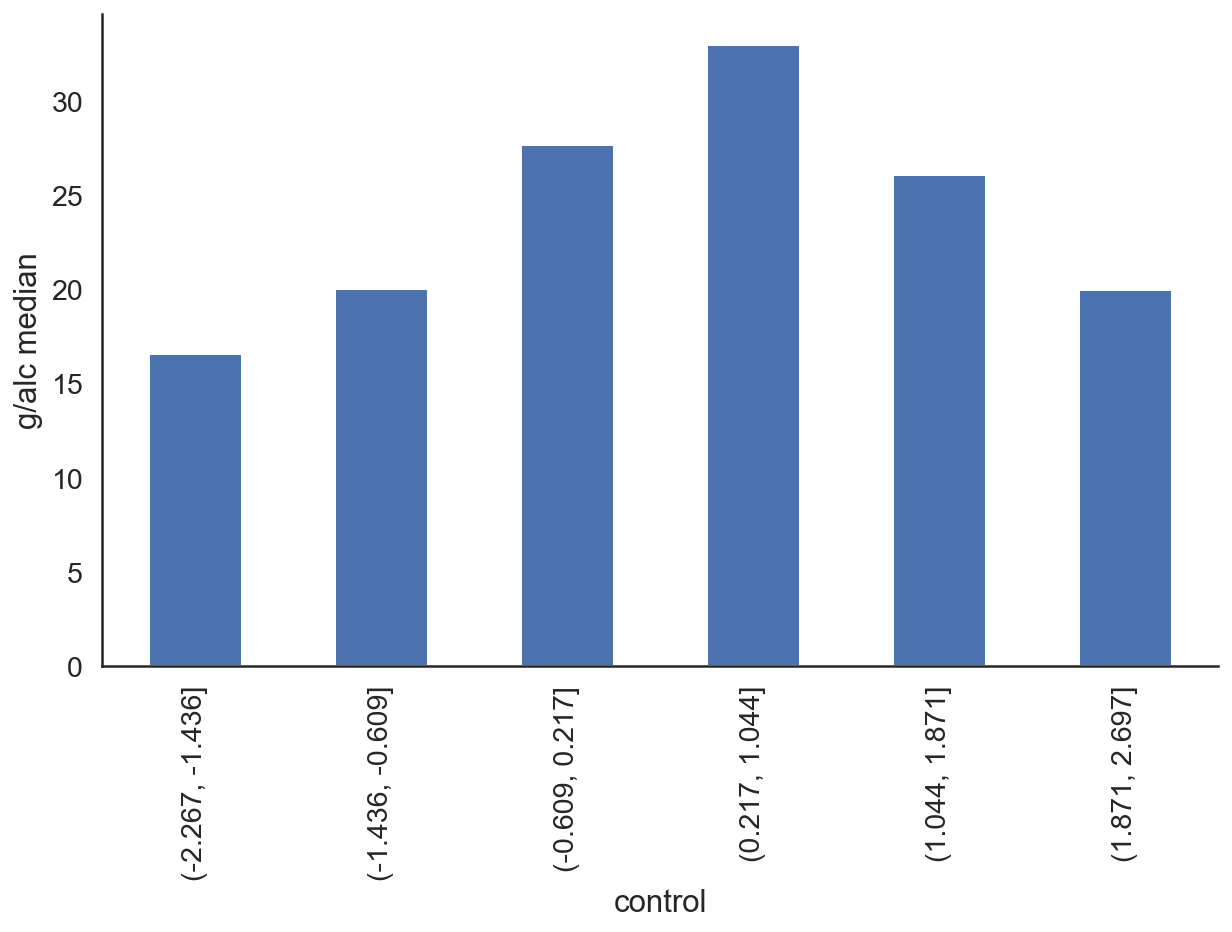

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.control_mean_within, 6)
ax = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('control')

#### Cognitive control and intention

In [ ]:
lmer_within_between('Factor_1_within', 'limit_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: limit_median ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 5121.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9544 -0.4464 -0.0803  0.2915  3.3343 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5308   0.7285  
 Residual                0.4448   0.6669  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.01609    0.04631  275.34285   0.348  0.72845    
Factor_1_within    -0.03823    0.01419 1919.77996  -2.694  0.00711 ** 
Factor_1_between   -0.20818    0.04562  275.02940  -4.563 7.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.024  0.000   


(-0.0382325574908792, 0.0071116442932052555)

<AxesSubplot:xlabel='Factor_1_between', ylabel='limit_median'>

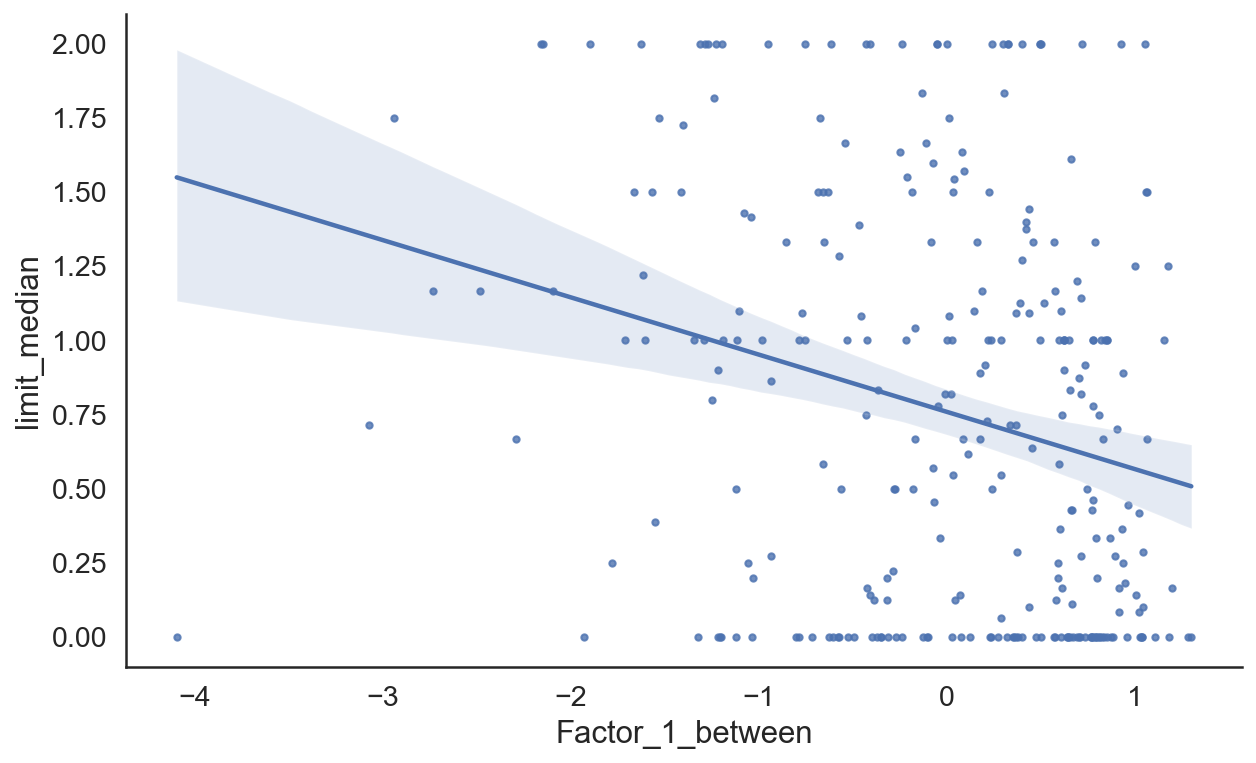

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'limit_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

<AxesSubplot:xlabel='Factor_1_within', ylabel='limit_median'>

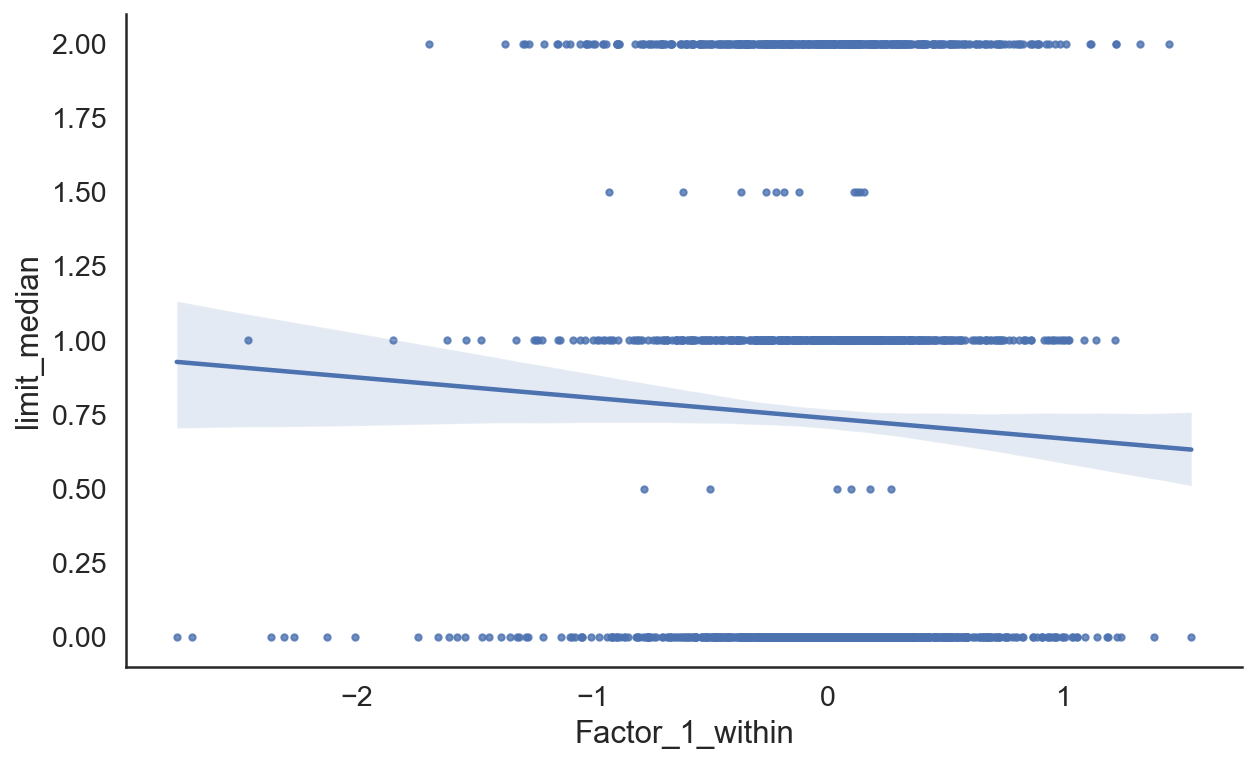

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_within', y = 'limit_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'Factor 1 within')

<Figure size 720x432 with 0 Axes>

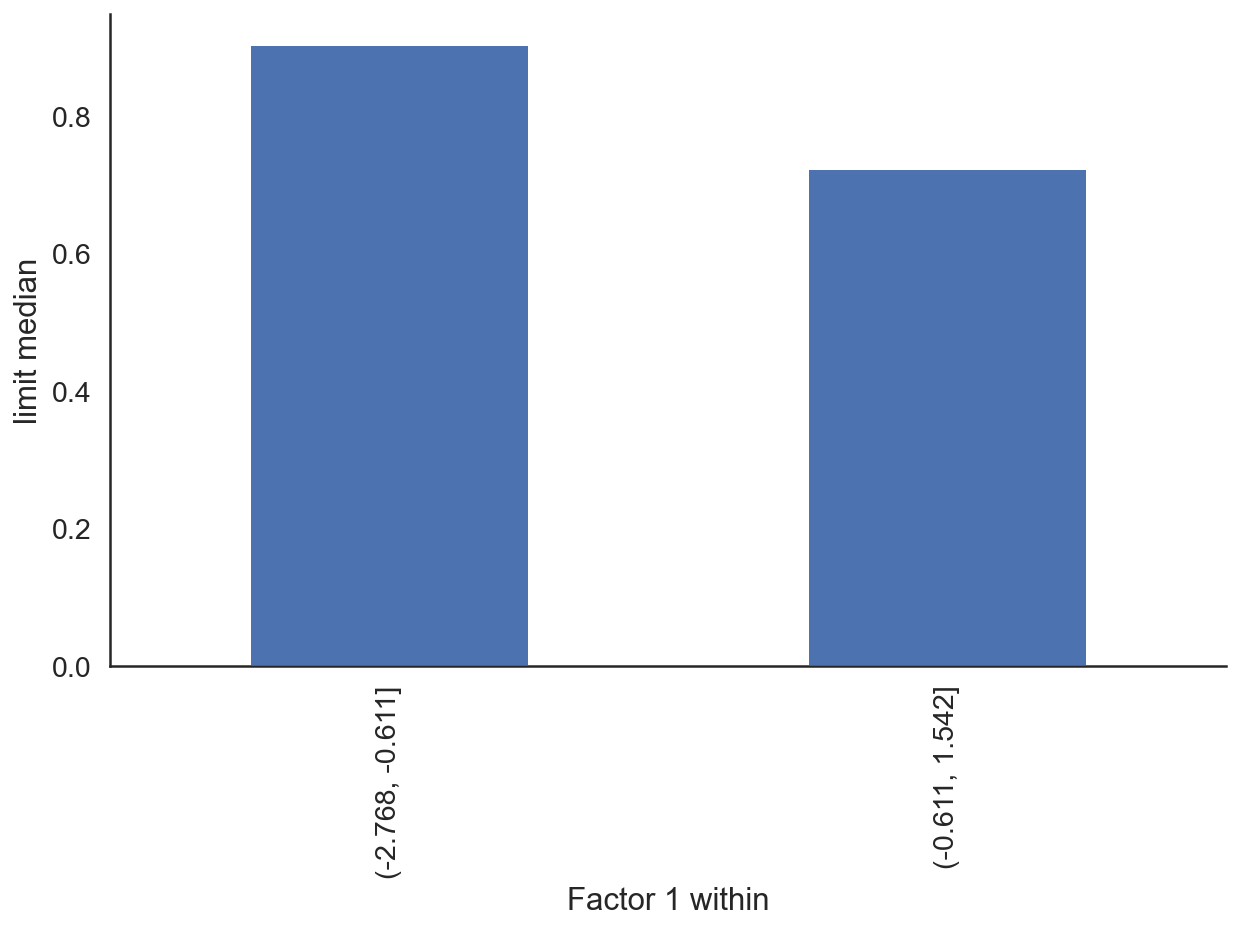

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.Factor_1_within, 2)
ax = cor3_d.groupby('limit_binned').limit_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('Factor 1 within')

#### Cognitive control and perceived control

In [ ]:
lmer_within_between('Factor_1_within', 'control_mean',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: control_mean ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 4515.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8992 -0.4678 -0.0963  0.3972  4.8397 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6674   0.8169  
 Residual                0.3166   0.5627  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)
(Intercept)       2.771e-03  5.044e-02  2.877e+02   0.055    0.956
Factor_1_within  -1.755e-02  1.197e-02  1.927e+03  -1.466    0.143
Factor_1_between -7.376e-02  4.971e-02  2.869e+02  -1.484    0.139

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.022  0.000   


(-0.017553023277282212, 0.14275529691600697)

#### Cognitive control and consumption

In [ ]:
lmer_within_between('Factor_1_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 4507.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5659 -0.3962 -0.0827  0.3946  8.7302 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6222   0.7888  
 Residual                0.3183   0.5642  
Number of obs: 2210, groups:  participant, 288

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        -0.04805    0.04885  291.66710  -0.984 0.326151    
Factor_1_within    -0.00195    0.01200 1931.35681  -0.162 0.871003    
Factor_1_between   -0.16290    0.04815  290.87438  -3.384 0.000814 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.022  0.000   


(-0.001949578293358182, 0.8710034263198414)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
cor4 = cor3.reset_index()

In [ ]:
stats.pearsonr(cor4['Factor_1'],cor4['Factor_3'])

In [ ]:
%%R -i cor4
require(lmerTest)
m <- lmer(Factor_3 ~ Factor_1 + (1|participant), data = cor4)
summary(m)

#### Intention as factor

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','session_number','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(Factor_1 ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(g_alc_median ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

### Cross-sectional effects based on longitudinal data

In [ ]:
#factor_scores = factor_scores.set_index('gbe_index').filter(like='Factor')
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna().groupby('participant').mean().reset_index()

In [ ]:
correlation_matrix(cor2)

In [ ]:
from scipy import stats
stats.pearsonr(cor2['Factor_1'], cor2['g_alc_median'])

### Average longitudinal correlation per participant

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
cor2.groupby('participant').corr().reset_index().groupby('level_1').mean()

## Hypotheses

- L1. Changes in inhibitory control relate negatively to real-life changes in drinking.
- L2. Changes in risk aversion for gains relate negatively to real-life changes in drinking.
- L3. Changes in risk aversion for losses relate positively to real-life changes in drinking.
- L4. Changes in loss aversion relate negatively to real-life changes in drinking.
- L5. Changes in sampling biases relate negatively to real-life changes in drinking.
- L6. Between-subject differences in working memory moderate the effects of changes in
inhibitory control and risk aversion on changes in drinking. Specifically, the expected positive and negative relationships between changes in inhibitory control as well as in risk aversion (see L1, L2, and L3) and drinking are stronger when working memory is low.
- L7. Between-subject differences in working memory moderate the effects of stress on drinking such that the positive relationship between stress and drinking is stronger when working memory is low.

### ToDo
- Decompose into between- and within-participant effects
- Check pre-registered model (interaction with WM)